<a href="https://colab.research.google.com/github/leaderman77/ev-sentiment-analysis/blob/main/EV_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 Social Media Dataset Collection

In [ ]:
!pip install praw
!pip install tqdm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.0/191.0 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 7.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993227 sha256=98156cca8f8f75efd3cd16cceae011f5f10ab4322968c3d016d413ff881cda96
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [ ]:
import pandas as pd
import numpy as np
import praw
import pprint
import csv
from datetime import datetime
from tqdm import tqdm

In [ ]:
SECRET="F-z8PpeLaDgXkAGjXcM4rB6aXs65aw"
APP_ID="M0izMVpnkOQ7Y6Fw1d5RYA"

reddit = praw.Reddit(
    client_id=APP_ID,
    client_secret=SECRET,
    user_agent="Comment Extraction"
)

In [ ]:
# # Define your search keywords
# keywords = ["Tesla Model 3 owner review", "Nissan Leaf daily driver experience", "comparision of a Nissan LEAF and a Tesla Model 3"]

# # Subreddits to search within, combine them using '+'
# subreddits = "electricvehicles"
# # Define the overall limit and calculate per-keyword limit
# overall_limit = 10  # or whatever your overall limit is
# per_keyword_limit = overall_limit // len(keywords)

# total_num_comments = 0
# for keyword in tqdm(keywords, desc="Processing Keywords"):
#     search_results = reddit.subreddit(subreddits).search(keyword, limit=per_keyword_limit)
#     print(search_results)
#     for submission in search_results:
#       print(submission.title)
#       print(submission.num_comments)
#       print(submission.url)
#       total_num_comments = total_num_comments + submission.num_comments
# print("Total number of comments for keywords: ", total_num_comments)

Processing Keywords:   0%|          | 0/3 [00:00<?, ?it/s]WARNING:praw:It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Processing Keywords:  33%|███▎      | 1/3 [00:00<00:01,  1.81it/s]WARNING:praw:It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Tesla Model 3 Performance review 
282
https://www.reddit.com/r/electricvehicles/comments/1cbbkyu/tesla_model_3_performance_review/
Former Tesla Model S and Model 3 owner. Recently got myself the BMW i4 M50
510
https://www.reddit.com/gallery/10fuz7o
Tesla cuts prices of Model 3 and Model Y again
551
https://mashable.com/article/tesla-model-3-model-y-price-cuts


Processing Keywords:  67%|██████▋   | 2/3 [00:00<00:00,  2.46it/s]WARNING:praw:It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Might be regretting new Nissan leaf
195
https://www.reddit.com/r/electricvehicles/comments/19677mk/might_be_regretting_new_nissan_leaf/
2024 Nissan LEAF pricing starts at $28,140
311
https://usa.nissannews.com/en-US/releases/release-53eded77170b31a76f9130c7b204aeee-2024-nissan-leaf-pricing-starts-at-28140
Texting a dealer about a used Nissan Leaf.
276
https://www.reddit.com/gallery/n4ymv2


Processing Keywords: 100%|██████████| 3/3 [00:01<00:00,  2.51it/s]

Why I chose a Nissan Leaf SV Plus over Tesla Model 3 and Chevy Bolt (and others)
35
https://www.reddit.com/r/electricvehicles/comments/18fjvoc/why_i_chose_a_nissan_leaf_sv_plus_over_tesla/
Our current EV collection! 2016 Nissan Leaf SV, and a 2023 Tesla Model 3 RWD. More info in comments
42
https://www.reddit.com/gallery/161thva
The Tesla Model 3 has overtaken the BMW i3 and is now the third best selling EV in Norway of all time, behind the Nissan Leaf and VW e-Golf
27
https://i.redd.it/51xm2j7ynt771.png
Total number of comments for keywords:  2229


In [ ]:
# Define your search keywords
keywords = ["Tesla Model 3 owner review",
            "Nissan Leaf daily driver experience",
            "comparision of a Nissan LEAF and a Tesla Model 3"]

# Subreddits to search within, combine them using '+'
subreddits = "electricvehicles"

# Create a list to store each row as a dictionary
rows_list = []

# Define the overall limit and calculate per-keyword limit
overall_limit = 10  # or whatever your overall limit is
per_keyword_limit = overall_limit // len(keywords)

# Iterate through each keyword to search for relevant submissions
for keyword in tqdm(keywords, desc="Processing Keywords"):
    search_results = reddit.subreddit(subreddits).search(keyword, limit=per_keyword_limit)
    for submission in search_results:
        # Expand the submission comments
        submission.comments.replace_more(limit=None)

        for comment in submission.comments.list():
            # Create a dictionary for the current row
            row = {
                'comment_id': comment.id,
                'author': comment.author.name if comment.author else 'Deleted',
                'timestamp': datetime.fromtimestamp(comment.created_utc).strftime('%Y-%m-%d %H:%M:%S'),
                'upvotes': comment.score,
                'text': comment.body.replace('\n', ' '),
                'parent_id': comment.parent_id,
                'subreddit': str(comment.subreddit),
                'awards': len(comment.all_awardings)
            }
            rows_list.append(row)

# Convert list of dictionaries to a DataFrame
df_comments = pd.DataFrame(rows_list)

# Columns can be specified explicitly if they are not in the first dictionary or to ensure order
df_comments = pd.DataFrame(rows_list, columns=[
    'comment_id', 'author', 'timestamp', 'upvotes',
    'text', 'parent_id', 'subreddit', 'awards'
])

df_comments

Processing Keywords:   0%|          | 0/3 [00:00<?, ?it/s]WARNING:praw:It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environ

comment_id             author            timestamp  upvotes  \
0       l0xeath         GriddyGang  2024-04-23 18:33:35      111   
1       l0xcwnq  jenesuispasbavard  2024-04-23 18:25:47       34   
2       l0xfnq0           Recoil42  2024-04-23 18:41:11       27   
3       l0xogr9         Chudsaviet  2024-04-23 19:30:00       85   
4       l0yp5ae          JimmyNo83  2024-04-23 23:02:50        5   
...         ...                ...                  ...      ...   
2251    h3aok3i        LightItUp90  2021-06-28 07:00:26        2   
2252    h3b5seh           aigarius  2021-06-28 11:28:00        1   
2253    h39hffb       ElectroSpore  2021-06-27 23:19:15        3   
2254    h39hyd2              JB_UK  2021-06-27 23:24:16        2   
2255    h39j03h       ElectroSpore  2021-06-27 23:34:15        1   

                                                   text   parent_id  \
0     Man this is tempting at 45 thousand. Absolutel...  t3_1cbbkyu   
1                                     I like the seats.  t3_1cbbkyu   
2     I like the look of the wheels, but mannnnn tho...  t3_1cbbkyu   
3     No ultrasonic sensors, no radar, no blinker st...  t3_1cbbkyu   
4     It’s killer at that price. The m3 is just a li...  t3_1cbbkyu   
...                                                 ...         ...   
2251  600k NOK. And probably yeah. But Model S and X...  t1_h3anqsz   
2252  I mean the year before the long March of 2020 ...  t1_h39hdbu   
2253  Personally, I expect Tesla to still dominate g...  t1_h39g5mt   
2254  On this measure VW should maintain pace, in th...  t1_h39hffb   
2255  I expect both to keep growing, more pointing o...  t1_h39hyd2   

             subreddit  awards  
0     electricvehicles       0  
1     electricvehicles       0  
2     electricvehicles       0  
3     electricvehicles       0  
4     electricvehicles       0  
...                ...     ...  
2251  electricvehicles       0  
2252  electricvehicles       0  
2253  electricvehicles       0  
2254  electricvehicles       0  
2255  electricvehicles       0  

[2256 rows x 8 columns]

In [ ]:
# Save to CSV
df_comments.to_csv('reddit_comments.csv', index=False, encoding='utf-8')
print("Data has been written to reddit_comments.csv")

Data has been written to reddit_comments.csv


In [ ]:
# post_url ="https://www.reddit.com/r/electricvehicles/comments/108tnos/honest_opinions_on_owning_a_tesla_model_3/?onetap_auto=true"
# post_url1 = 'https://www.reddit.com/r/CarTalkUK/comments/18lwlt9/electric_car_experiences/' #Electric car experiences?
# post_url2 = 'https://www.reddit.com/r/cars/comments/10wfm08/this_is_ruining_electric_cars_the_charging/' #The charging experience is just as important as the car experience.
# post_url3 = 'https://www.reddit.com/r/CarTalkUK/comments/12bcr5d/how_evs_are_ecologically_better/' #How EVs are ecologically “better”?
# post_url4 = 'https://www.reddit.com/r/leaf/comments/166hyzj/honest_experience_of_a_leaf_in_the_uk/' #Honest experience of a Leaf in the UK
# post_url5 = 'https://www.reddit.com/r/leaf/comments/16zcvcg/is_a_used_leaf_a_good_first_car_for_a_new_driver/' #Is a used Leaf a good first car for a new driver?
# post_url6 = 'https://www.reddit.com/r/electricvehicles/comments/15lhhsj/advice_is_it_cheaper_to_refuel_your_ev_battery_or/' #Advice | Is it cheaper to refuel your EV battery or gas tank? We did the math in all 50 states.
# post_url7 = 'https://www.reddit.com/r/electricvehicles/comments/16hmyxt/are_you_really_saving_money_from_electric/' #Are you really saving money from electric?
# post_url8 = 'https://www.reddit.com/r/cars/comments/ttwuud/owners_of_electric_cars_how_much_do_you_save_from/' #Owners of electric cars, how much $ do you save from the switch over?

# post_urls = [post_url, post_url1, post_url2, post_url3, post_url4, post_url5, post_url6, post_url7, post_url8]

In [ ]:
# df_comments = pd.DataFrame(columns=['comment_id', 'author', 'timestamp', 'upvotes', 'text', 'parent_id', 'subreddit', 'awards'])

# for url in tqdm(post_urls, desc="Processing URLs"):
#   # Extract the submission ID from the URL
#   submission_id = url.split('/')[-3]

#   # Fetch the submission (post) by ID
#   submission = reddit.submission(id=submission_id)

#   # Expand the submission comments
#   submission.comments.replace_more(limit=None)

#   for comment in submission.comments.list():
#         df_comments = df_comments.append({
#             'comment_id': comment.id,
#             'author': comment.author.name if comment.author else 'Deleted',
#             'timestamp': datetime.fromtimestamp(comment.created_utc).strftime('%Y-%m-%d %H:%M:%S'),
#             'upvotes': comment.score,
#             'text': comment.body.replace('\n', ' '),
#             'parent_id': comment.parent_id,
#             'subreddit': str(comment.subreddit),
#             'awards': len(comment.all_awardings)
#         }, ignore_index=True)

# df_comments

In [ ]:
# # Open a CSV file to write the comments
# with open('reddit_comments.csv', 'w', newline='', encoding='utf-8') as file:
#     writer = csv.writer(file)
#     # Write the header row
#     writer.writerow(['comment_id', 'author', 'timestamp', 'upvotes', 'text', 'parent_id', 'subreddit', 'awards'])

#     # Iterate through the comments and write data to the CSV
#     for comment in submission.comments.list():
#         # Convert timestamp to readable format
#         timestamp = datetime.fromtimestamp(comment.created_utc).strftime('%Y-%m-%d %H:%M:%S')
#         # Write comment data
#         writer.writerow([
#             comment.id,
#             comment.author.name if comment.author else 'Deleted',
#             timestamp,
#             comment.score,
#             comment.body.replace('\n', ' '),  # Replace newlines in comments to keep each comment in one row
#             comment.parent_id,
#             str(comment.subreddit),
#             len(comment.all_awardings)  # Number of awards
#         ])

# print("Data has been written to reddit_comments.csv")

Data has been written to reddit_comments.csv


# 2 Data Preprocessing

In [ ]:
!pip install contractions
!pip install pyspellchecker
!pip install langdetect
!pip install fasttext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993227 sha256=c960f84ad15078cdfa865a9c05157860045f12f42ca02ca888b39066b73e64ee
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [ ]:
!pip install fasttext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 1.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached pybind11-2.12.0-py3-none-any.whl (234 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp310-cp310-linux_x86_64.whl size=4227139 sha256=2b88903210c6b23a1a847d58b6b7c5d186d31e8484cc8fe5777e2153ca2415e5
  Stored in directory: /root/.cache/pip/wheels/a5/13/75/f811c84a8ab36eedbaef977a6a58a98990e8e0f1967f98f394
Successfully built fasttext


In [ ]:
import pandas as pd
import nltk
import re
import contractions
from spellchecker import SpellChecker

In [ ]:
df = pd.read_csv('/content/reddit_comments.csv')
df.head()

comment_id             author            timestamp  upvotes  \
0    l0xeath         GriddyGang  2024-04-23 18:33:35      111   
1    l0xcwnq  jenesuispasbavard  2024-04-23 18:25:47       34   
2    l0xfnq0           Recoil42  2024-04-23 18:41:11       27   
3    l0xogr9         Chudsaviet  2024-04-23 19:30:00       85   
4    l0yp5ae          JimmyNo83  2024-04-23 23:02:50        5   

                                                text   parent_id  \
0  Man this is tempting at 45 thousand. Absolutel...  t3_1cbbkyu   
1                                  I like the seats.  t3_1cbbkyu   
2  I like the look of the wheels, but mannnnn tho...  t3_1cbbkyu   
3  No ultrasonic sensors, no radar, no blinker st...  t3_1cbbkyu   
4  It’s killer at that price. The m3 is just a li...  t3_1cbbkyu   

          subreddit  awards  
0  electricvehicles       0  
1  electricvehicles       0  
2  electricvehicles       0  
3  electricvehicles       0  
4  electricvehicles       0

In [ ]:
nltk.download([
    "stopwords",
    "punkt",
    "wordnet",
    "words",
    "averaged_perceptron_tagger",
    "maxent_ne_chunker",
    "brown",
    ])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


True

In [ ]:
df['text'].head(10)

0    Man this is tempting at 45 thousand. Absolutel...
1                                    I like the seats.
2    I like the look of the wheels, but mannnnn tho...
3    No ultrasonic sensors, no radar, no blinker st...
4    It’s killer at that price. The m3 is just a li...
5    Considering it's the cheapest AWD Model 3 (in ...
6    I know I’m late, but this is not a review. Thi...
7                                       Now add stalks
8    Here’s a real review from someone who drives‼️...
9    This is going to change the world of performan...
Name: text, dtype: object

In [ ]:
for text in df['text'].head(10):
    print(text)
    print('-' * 40)

Man this is tempting at 45 thousand. Absolutely love the seats, and spoiler/wheel additions. 
----------------------------------------
I like the seats.
----------------------------------------
I like the look of the wheels, but mannnnn those are going to be curb magnets.
----------------------------------------
No ultrasonic sensors, no radar, no blinker stalks, no gear shifter, no instrument cluster, no CarPlay.
----------------------------------------
It’s killer at that price. The m3 is just a little too snug of a fit for me. Would love to see the MY version of it.
----------------------------------------
Considering it's the cheapest AWD Model 3 (in the US) it's a no-brainer if you need AWD and don't particularly care about the tiny bit of extra range in the LR. I feel like that's a fairly decent subset of your M3 shoppers.   The Performance part of performance, I just couldn't care less about. In 99% of real world driving there's just no scenario where the difference between 3 an

In [ ]:
def expand_contractions(text):
  # Expand contractions in the text.
    return contractions.fix(text)

In [ ]:
corrections = {
    "m3": "tesla model 3", # Correcting model shorthand
    "model 3": "tesla model 3",
    "model s":"tesla model s",
    "vw":"volkswagen",
    "ice": "internal combustion engines",
    "mi":"miles",
    "1k": "1000",
    "nisan": "nissan",  # Correcting a common misspelling
    "leaf": "nissan leaf",
    "ev": "electric vehicle",
    "evs": "electric vehicles"
}

spell = SpellChecker()

def correct_misspellings(text):
  # removes punctuation and other non-word, non-whitespace characters from the text
  text = re.sub(r'[^\w\s]', '', text)
  words = text.split()
  corrected_words = []
  for word in words:
      # First check if the word is in the custom corrections dictionary
      if word in corrections.keys():
          corrected_words.append(corrections[word])
      else:
          # Use spellchecker to correct the word
          corrected_word = spell.correction(word)
          # Ensure the corrected word is not None or empty; revert to original word if it is
          if corrected_word:
              corrected_words.append(corrected_word)
          else:
              corrected_words.append(word)
  return ' '.join(corrected_words)

In [ ]:
def preprocess_phrases(text):
    # Replace spaces in specific phrases with underscores to ensure they are tokenized as single tokens
    text = text.replace('tesla model 3', 'tesla_model_3')
    text = text.replace('nissan leaf', 'nissan_leaf')
    return text

In [ ]:
def revert_phrases(tokens):
    # Revert the underscores back to spaces
    tokens = [token.replace('tesla_model_3', 'tesla model 3') for token in tokens]
    tokens = [token.replace('nissan_leaf', 'nissan leaf') for token in tokens]
    # return tokens
    return ' '.join(tokens)

In [ ]:
def clean_text(text):
  # remove http or https
  text = re.sub(r'http\S+|www\S+|https\S+', '', text)

  # string that starts with @ followed by one or more word characters
  text = re.sub(r'\@\w+', '', text)

  # Remove numbers except within phrases like "tesla_model_3" and "nissan_leaf"
  text = re.sub(r'(?<!\btesla_model_)(?<!\bnissan_leaf)\d+', '', text)

  # replaces sequences of whitespace characters with a single space
  text = re.sub(r'\s+', ' ', text).strip()

  # removes punctuation and other non-word, non-whitespace characters from the text
  text = re.sub(r'[^\w\s]', '', text)

  # remove HTML code
  text = re.sub(r'<[^>]+>', '', text)
  return text

In [ ]:
def tokenize_text(text):
    # Tokenize the text
    tokens = nltk.word_tokenize(text)
    return tokens

In [ ]:
def get_wordnet_pos(treebank_tag):
    """Converts treebank tags to wordnet tags."""
    if treebank_tag.startswith('J'):
        return nltk.corpus.wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return nltk.corpus.wordnet.VERB
    elif treebank_tag.startswith('N'):
        return nltk.corpus.wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return nltk.corpus.wordnet.ADV
    else:
        return nltk.corpus.wordnet.NOUN  # Default to noun if no match

In [ ]:
def lemmatize_words(tokens):
  # create lemmatizer object
  lemmatizer = nltk.stem.WordNetLemmatizer()

  pos_tagged = nltk.pos_tag(tokens)  # Get POS tags for each token

  # lemmatize each token
  # lemmatized_words = [lemmatizer.lemmatize(token) for token in tokens]
  lemmatized_words = [lemmatizer.lemmatize(word, get_wordnet_pos(tag)) for word, tag in pos_tagged]
  return lemmatized_words

In [ ]:
def remove_stopwords(texts):
  # get list of stopwords in English
  stopwords = set(nltk.corpus.stopwords.words("english"))

  # remove stopwords
  removed_stopwords = [text for text in texts if text not in stopwords]
  return removed_stopwords

In [ ]:
words_to_remove = ['bissau', 'got', 'would', 'get']
def remove_unwanted_words(text):
    for word in words_to_remove:
        text = text.replace(word, '')
    return text

In [ ]:
def preprocess_pipeline(text):
    # Expand contractions
    text = expand_contractions(text)
    # Lowercase text
    text = text.lower()
    # Correct common misspellings and abbreviations
    text = correct_misspellings(text)
    # Preprocess to adjust phrases
    text = preprocess_phrases(text)
    # Remove unwanted words
    text = remove_unwanted_words(text)
    # Clean text
    text = clean_text(text)
    # Tokenize text
    tokens = tokenize_text(text)
    # Remove stopwords
    tokens = remove_stopwords(tokens)
    # Lemmatize words
    tokens = lemmatize_words(tokens)
    # Revert changes to phrases for nissan leaf and tesla model 3
    text = revert_phrases(tokens)

    return text

In [ ]:
# Apply the cleaning function to text column
df['cleaned_text'] = df['text'].apply(preprocess_pipeline)
df

comment_id             author            timestamp  upvotes  \
0       l0xeath         GriddyGang  2024-04-23 18:33:35      111   
1       l0xcwnq  jenesuispasbavard  2024-04-23 18:25:47       34   
2       l0xfnq0           Recoil42  2024-04-23 18:41:11       27   
3       l0xogr9         Chudsaviet  2024-04-23 19:30:00       85   
4       l0yp5ae          JimmyNo83  2024-04-23 23:02:50        5   
...         ...                ...                  ...      ...   
2251    h3aok3i        LightItUp90  2021-06-28 07:00:26        2   
2252    h3b5seh           aigarius  2021-06-28 11:28:00        1   
2253    h39hffb       ElectroSpore  2021-06-27 23:19:15        3   
2254    h39hyd2              JB_UK  2021-06-27 23:24:16        2   
2255    h39j03h       ElectroSpore  2021-06-27 23:34:15        1   

                                                   text   parent_id  \
0     Man this is tempting at 45 thousand. Absolutel...  t3_1cbbkyu   
1                                     I like the seats.  t3_1cbbkyu   
2     I like the look of the wheels, but mannnnn tho...  t3_1cbbkyu   
3     No ultrasonic sensors, no radar, no blinker st...  t3_1cbbkyu   
4     It’s killer at that price. The m3 is just a li...  t3_1cbbkyu   
...                                                 ...         ...   
2251  600k NOK. And probably yeah. But Model S and X...  t1_h3anqsz   
2252  I mean the year before the long March of 2020 ...  t1_h39hdbu   
2253  Personally, I expect Tesla to still dominate g...  t1_h39g5mt   
2254  On this measure VW should maintain pace, in th...  t1_h39hffb   
2255  I expect both to keep growing, more pointing o...  t1_h39hyd2   

             subreddit  awards  \
0     electricvehicles       0   
1     electricvehicles       0   
2     electricvehicles       0   
3     electricvehicles       0   
4     electricvehicles       0   
...                ...     ...   
2251  electricvehicles       0   
2252  electricvehicles       0   
2253  electricvehicles       0   
2254  electricvehicles       0   
2255  electricvehicles       0   

                                           cleaned_text  
0     man tempt thousand absolutely love seat spoile...  
1                                             like seat  
2                    like look wheel man go curb magnet  
3     ultrasonic sensor radar blinker stalk gear shi...  
4     killer price tesla model 3 little snug fit lov...  
...                                                 ...  
2251  k probably yeah model x sell poorly already do...  
2252  mean year long march decline start qi tesla e ...  
2253  personally expect tesla still dominate globall...  
2254  measure volkswagen maintain pace next year two...  
2255  expect keep grow point growth rate interesting...  

[2256 rows x 9 columns]

In [ ]:
def define_len(row):
  return len(row["cleaned_text"])

df["len"] = df.apply(define_len, axis=1)
df = df[df["len"] >= 10].copy()

In [ ]:
import fasttext

# Load pre-trained language model
model = fasttext.load_model('/content/lid.176.bin')

def detect_language(text):
    predictions = model.predict(text, k=1)  # k=1 for the top prediction
    return predictions[0][0].replace("__label__", "")  # Extracting language label

# Apply the function to the 'text' column specifically
df["lang"] = df['text'].apply(detect_language)

In [ ]:
df.lang.value_counts()

lang
en    2091
es       2
de       2
zh       1
sv       1
ru       1
nl       1
pl       1
uz       1
Name: count, dtype: int64

In [ ]:
non_english_rows = df[df['lang'] != 'en']
non_english_rows[['text', 'cleaned_text', 'lang']]

text             cleaned_text lang
24                      No rain sensor              rain sensor   es
98                  /u/ SeñorBuzzkill             señorbuzzkill   zh
344                   The BMW Nostrils              bow nostril   sv
836          I’ll wait till it’s free.           wait till free   ru
952                 And a door handle.              door handle   nl
996   ![gif](giphy|xT5LMESsx1kUe8Hiyk)  gifgiphyxtlmessxkuehiyk   pl
1587                   Sill chademo? 🤮               sill chemo   uz
1649                   Tomato, tomahto            tomato tomato   es
1900                     Tesla killer!             tesla killer   de
2024        You’re chlorophull of shit         chlorophyll shit   de

In [ ]:
df = df[df["lang"]=="en"].copy()

Final dataset

In [ ]:
df

comment_id        author            timestamp  upvotes  \
0       l0xeath    GriddyGang  2024-04-23 18:33:35      111   
2       l0xfnq0      Recoil42  2024-04-23 18:41:11       27   
3       l0xogr9    Chudsaviet  2024-04-23 19:30:00       85   
4       l0yp5ae     JimmyNo83  2024-04-23 23:02:50        5   
5       l0xx1fd      SpyCake1  2024-04-23 20:17:12       12   
...         ...           ...                  ...      ...   
2251    h3aok3i   LightItUp90  2021-06-28 07:00:26        2   
2252    h3b5seh      aigarius  2021-06-28 11:28:00        1   
2253    h39hffb  ElectroSpore  2021-06-27 23:19:15        3   
2254    h39hyd2         JB_UK  2021-06-27 23:24:16        2   
2255    h39j03h  ElectroSpore  2021-06-27 23:34:15        1   

                                                   text   parent_id  \
0     Man this is tempting at 45 thousand. Absolutel...  t3_1cbbkyu   
2     I like the look of the wheels, but mannnnn tho...  t3_1cbbkyu   
3     No ultrasonic sensors, no radar, no blinker st...  t3_1cbbkyu   
4     It’s killer at that price. The m3 is just a li...  t3_1cbbkyu   
5     Considering it's the cheapest AWD Model 3 (in ...  t3_1cbbkyu   
...                                                 ...         ...   
2251  600k NOK. And probably yeah. But Model S and X...  t1_h3anqsz   
2252  I mean the year before the long March of 2020 ...  t1_h39hdbu   
2253  Personally, I expect Tesla to still dominate g...  t1_h39g5mt   
2254  On this measure VW should maintain pace, in th...  t1_h39hffb   
2255  I expect both to keep growing, more pointing o...  t1_h39hyd2   

             subreddit  awards  \
0     electricvehicles       0   
2     electricvehicles       0   
3     electricvehicles       0   
4     electricvehicles       0   
5     electricvehicles       0   
...                ...     ...   
2251  electricvehicles       0   
2252  electricvehicles       0   
2253  electricvehicles       0   
2254  electricvehicles       0   
2255  electricvehicles       0   

                                           cleaned_text  len lang  
0     man tempt thousand absolutely love seat spoile...   61   en  
2                    like look wheel man go curb magnet   34   en  
3     ultrasonic sensor radar blinker stalk gear shi...   76   en  
4     killer price tesla model 3 little snug fit lov...   59   en  
5     consider cheap model u obtainer need particula...  260   en  
...                                                 ...  ...  ...  
2251  k probably yeah model x sell poorly already do...  214   en  
2252  mean year long march decline start qi tesla e ...  193   en  
2253  personally expect tesla still dominate globall...  128   en  
2254  measure volkswagen maintain pace next year two...  134   en  
2255  expect keep grow point growth rate interesting...   57   en  

[2091 rows x 11 columns]

Save preprocessed dataframe

In [ ]:
df.to_csv('/content/preprocessed_data.csv', index=False)

In [ ]:
# Download the file to your local machine
from google.colab import files
files.download('/content/preprocessed_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# # analyse frequency disribution
# def analyse_freq_distr(texts):
#   fdist = nltk.FreqDist(texts)
#   print(fdist.most_common(3))
#   print(fdist.tabulate(3))
#   # print(fdist["tesla"])
def analyse_freq_distr(tokens):
    # Calculate frequency distribution
    fdist = nltk.FreqDist(tokens)
    # Print the most common words and their frequencies
    print("Most common words and their frequencies:")
    print(fdist.most_common(20))  # Adjust the number as needed
    print(fdist.tabulate(3))
    print(fdist["tesla model 3"])
    # Plot the frequency distribution
    fdist.plot(30, cumulative=False)  # Adjust the number of words to plot

# Analyze frequency distribution
# analyse_freq_distr(tokens)

In [ ]:
def remove_freq_distr(texts):
  # calculate the frequency of each word
  fdist = nltk.FreqDist(texts)
  # remove the most common words (e.g., the top 10% of words by frequency)
  removed_fdist = [fd_text for fd_text in texts if fdist[fd_text] < fdist.N() * 0.1 ]
  return removed_fdist

In [ ]:
def extracting_named_entities(texts):
  # identify named entities
  named_entities = nltk.ne_chunk(texts)

  return named_entities

# 3 Exploratory Analysis

## 1. Word Frequency Distribution

In [ ]:
!pip install wordcloud

In [ ]:
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from collections import Counter

In [ ]:
df_cleaned = df.copy()

Check columns of dataset

In [ ]:
df_cleaned.columns

Index(['comment_id', 'author', 'timestamp', 'upvotes', 'text', 'parent_id',
       'subreddit', 'awards', 'cleaned_text', 'len', 'lang'],
      dtype='object')

Convert timestamp data type to date time and rename the column name

In [ ]:
df_cleaned["timestamp"] = pd.to_datetime(df_cleaned["timestamp"])
df_cleaned.rename(columns={'timestamp': 'created_utc'}, inplace=True)

In [ ]:
df_cleaned.dtypes

comment_id              object
author                  object
created_utc     datetime64[ns]
upvotes                  int64
text                    object
parent_id               object
subreddit               object
awards                   int64
cleaned_text            object
len                      int64
lang                    object
dtype: object

In [ ]:
df_cleaned.describe()

created_utc      upvotes  awards          len
count                           2091  2091.000000  2091.0  2091.000000
mean   2023-05-05 13:18:49.908177920     7.281205     0.0   127.533238
min              2021-05-04 21:22:20   -94.000000     0.0    10.000000
25%              2023-01-19 21:21:45     1.000000     0.0    37.000000
50%              2023-08-26 13:57:50     2.000000     0.0    79.000000
75%              2023-10-08 15:31:48     6.000000     0.0   152.000000
max              2024-04-25 22:12:11   693.000000     0.0  1954.000000
std                              NaN    27.695271     0.0   163.143859

In [ ]:
df_cleaned.describe(include='all')

comment_id   author                    created_utc      upvotes  \
count        2091     2091                           2091  2091.000000   
unique       2091      881                            NaN          NaN   
top       l0xeath  Deleted                            NaN          NaN   
freq            1      139                            NaN          NaN   
mean          NaN      NaN  2023-05-05 13:18:49.908177920     7.281205   
min           NaN      NaN            2021-05-04 21:22:20   -94.000000   
25%           NaN      NaN            2023-01-19 21:21:45     1.000000   
50%           NaN      NaN            2023-08-26 13:57:50     2.000000   
75%           NaN      NaN            2023-10-08 15:31:48     6.000000   
max           NaN      NaN            2024-04-25 22:12:11   693.000000   
std           NaN      NaN                            NaN    27.695271   

                                                     text   parent_id  \
count                                                2091        2091   
unique                                               2089        1211   
top     My friends took their Leaf plus from Toronto t...  t3_10fuz7o   
freq                                                    2          67   
mean                                                  NaN         NaN   
min                                                   NaN         NaN   
25%                                                   NaN         NaN   
50%                                                   NaN         NaN   
75%                                                   NaN         NaN   
max                                                   NaN         NaN   
std                                                   NaN         NaN   

               subreddit  awards      cleaned_text          len  lang  
count               2091  2091.0              2091  2091.000000  2091  
unique                 1     NaN              2085          NaN     1  
top     electricvehicles     NaN  bolt discontinue          NaN    en  
freq                2091     NaN                 2          NaN  2091  
mean                 NaN     0.0               NaN   127.533238   NaN  
min                  NaN     0.0               NaN    10.000000   NaN  
25%                  NaN     0.0               NaN    37.000000   NaN  
50%                  NaN     0.0               NaN    79.000000   NaN  
75%                  NaN     0.0               NaN   152.000000   NaN  
max                  NaN     0.0               NaN  1954.000000   NaN  
std                  NaN     0.0               NaN   163.143859   NaN

Time Analysis

<Axes: title={'center': 'comments posted over time'}, xlabel='date', ylabel='comments'>

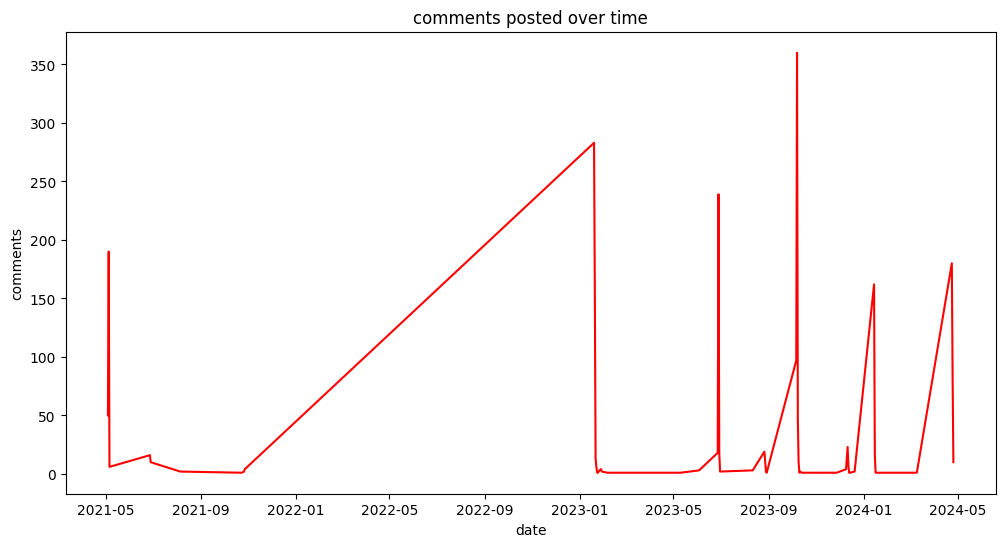

In [ ]:
df_cleaned.groupby(df_cleaned["created_utc"].dt.date).size().plot(figsize=(12, 6),
    title="comments posted over time",ylabel="comments", xlabel="date", color="r")

Analysis of authors data

In [ ]:
df_cleaned["author"].describe()

count        2091
unique        881
top       Deleted
freq          139
Name: author, dtype: object

<Axes: title={'center': 'no. comments posted by the top 15 authors'}, xlabel='author', ylabel='comments'>

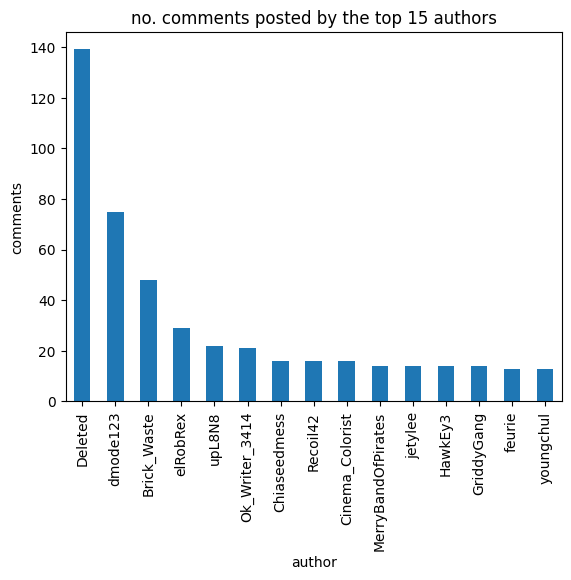

In [ ]:
df_cleaned.groupby(df_cleaned["author"]).size().sort_values(ascending=False).iloc[0:15].plot(kind="bar", ylabel="comments",
      title="no. comments posted by the top 15 authors")

<Axes: title={'center': "no. comments posted by the top 15 authors without 'Deleted' account"}, xlabel='author', ylabel='comments'>

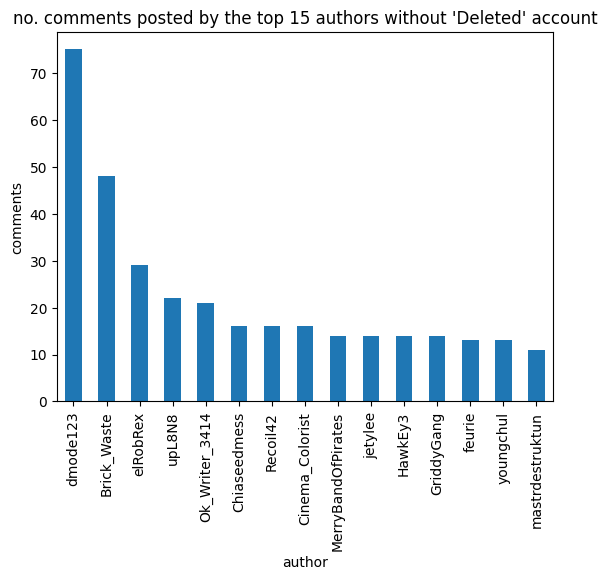

In [ ]:
df_cleaned.groupby(df_cleaned["author"]).size().sort_values(ascending=False).iloc[1:16].plot(kind="bar", ylabel="comments",
      title="no. comments posted by the top 15 authors without 'Deleted' account")

## 2. Visualization: Word Frequency

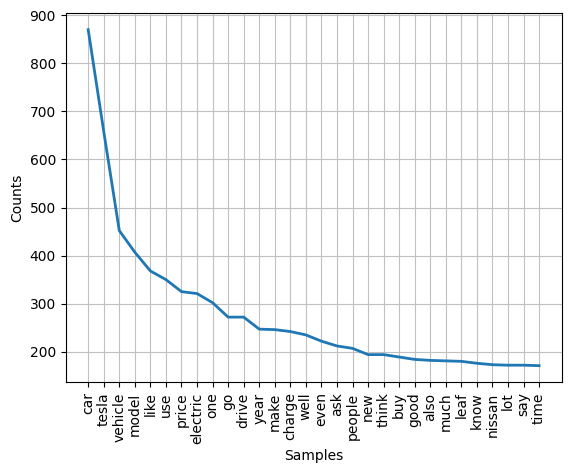

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
words = [word for sublist in df_cleaned['cleaned_text'].str.split() for word in sublist]
fdist = nltk.FreqDist(words)
# Plot the frequency distribution
fdist.plot(30, cumulative=False)

In [ ]:
print("Most common words and their frequencies:")
# fdist.tabulate(30)
fdist.most_common(20)

Most common words and their frequencies:


[('car', 870),
 ('tesla', 658),
 ('vehicle', 452),
 ('model', 407),
 ('like', 368),
 ('use', 350),
 ('price', 325),
 ('electric', 321),
 ('one', 302),
 ('go', 272),
 ('drive', 272),
 ('year', 247),
 ('make', 246),
 ('charge', 242),
 ('well', 235),
 ('even', 222),
 ('ask', 212),
 ('people', 207),
 ('new', 194),
 ('think', 194)]

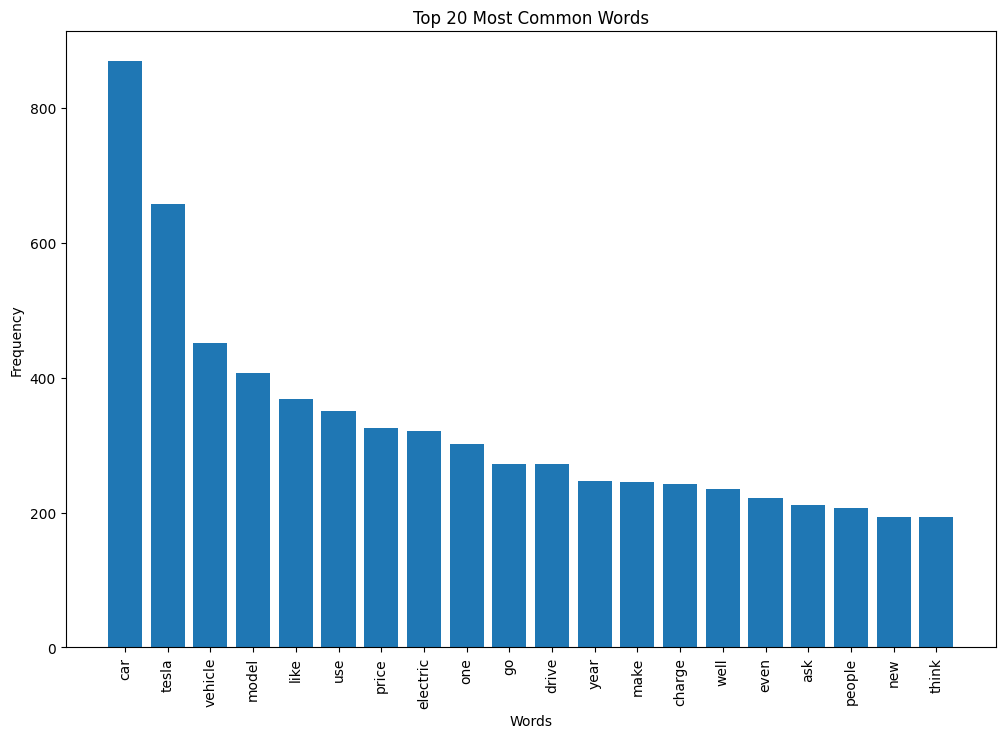

In [ ]:
words = [word for sublist in df_cleaned['cleaned_text'].str.split() for word in sublist]

# Calculate frequency of each word
word_freq = Counter(words)

# Get the 20 most common words
common_words = word_freq.most_common(20)

# Extract data for plotting
words, frequencies = zip(*common_words)

# Bar chart
plt.figure(figsize=(12, 8))
plt.bar(words, frequencies)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.title('Top 20 Most Common Words')
plt.show()

## 3. Phrase and Bigram Frequency Distribution

In [ ]:
words = [word for sublist in df_cleaned['cleaned_text'].str.split() for word in sublist]

In [ ]:
# Generate bigrams for all words
all_bigrams = list(nltk.bigrams(words))
bigrams_count = Counter(all_bigrams)

# Get the most common bigrams
most_common_bigrams = bigrams_count.most_common(20)
most_common_bigrams

[(('electric', 'vehicle'), 290),
 (('nissan', 'leaf'), 173),
 (('tax', 'credit'), 83),
 (('internal', 'combustion'), 67),
 (('combustion', 'engine'), 67),
 (('road', 'trip'), 66),
 (('test', 'drive'), 40),
 (('new', 'car'), 39),
 (('tesla', 'model'), 38),
 (('build', 'quality'), 30),
 (('model', '3'), 24),
 (('engine', 'car'), 24),
 (('steer', 'wheel'), 23),
 (('last', 'year'), 23),
 (('make', 'sense'), 22),
 (('buy', 'new'), 21),
 (('brand', 'new'), 21),
 (('price', 'cut'), 21),
 (('gon', 'na'), 20),
 (('fast', 'charge'), 18)]

## 4. Visualization: Bigram Frequencies

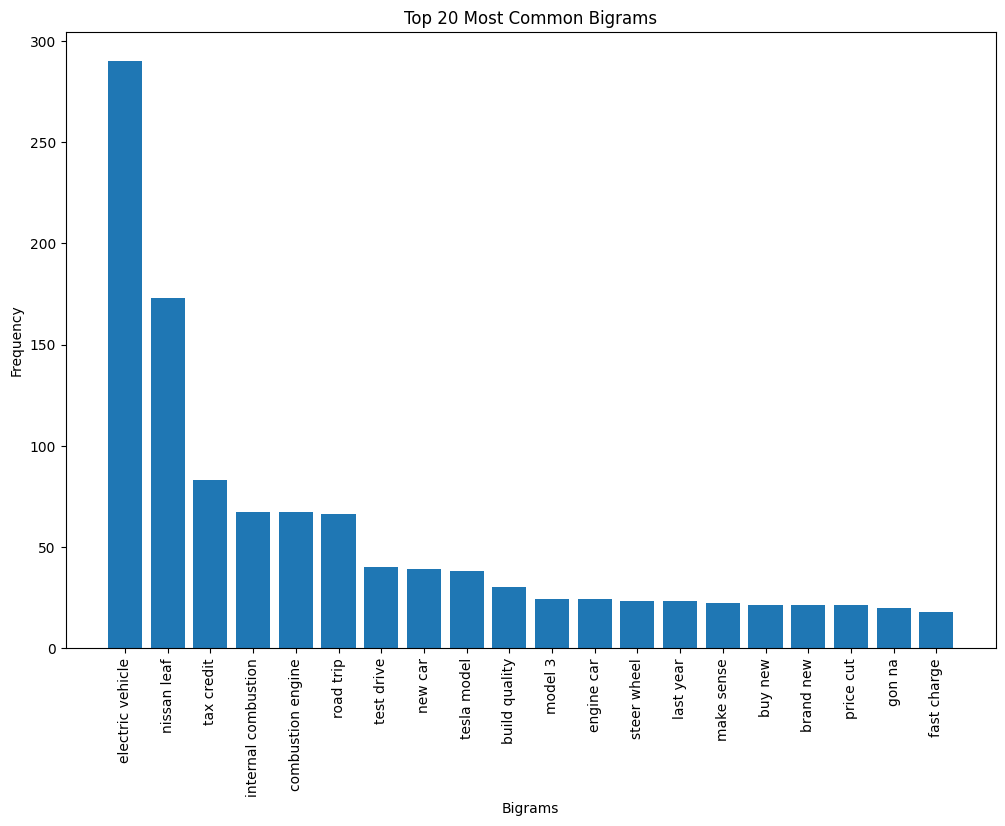

In [ ]:
# Extract data for plotting bigrams
bigram_words, bigram_freq = zip(*most_common_bigrams)
bigram_labels = [f'{w1} {w2}' for w1, w2 in bigram_words]

# Bigram bar chart
plt.figure(figsize=(12, 8))
plt.bar(bigram_labels, bigram_freq)
plt.xlabel('Bigrams')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.title('Top 20 Most Common Bigrams')
plt.show()

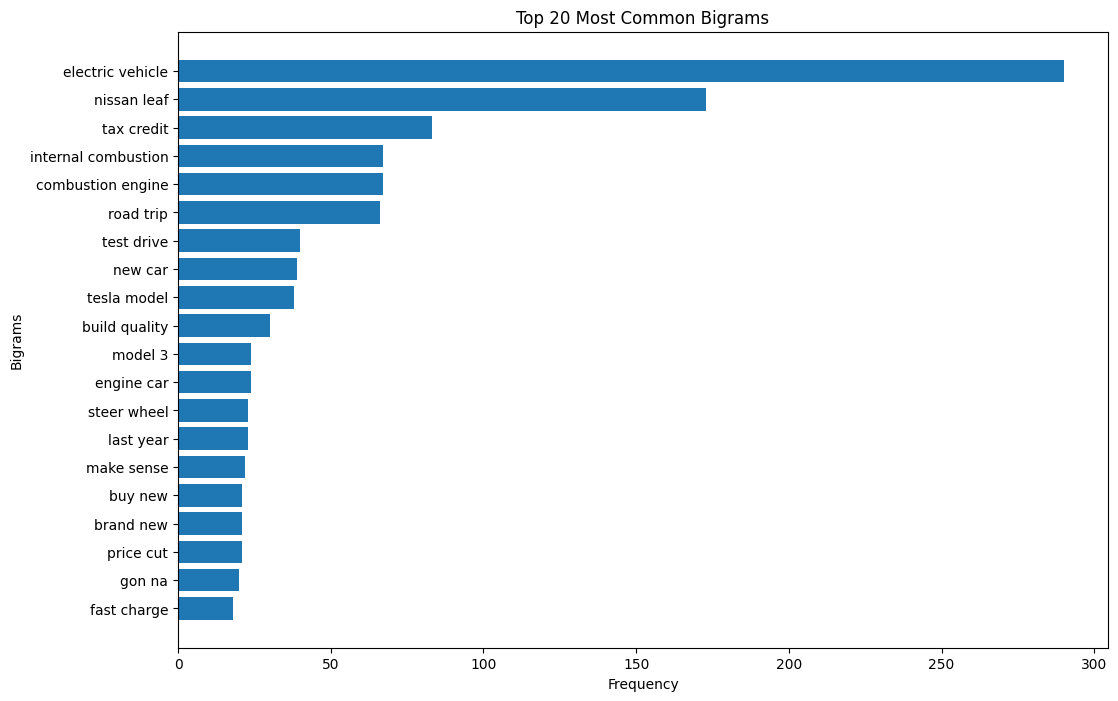

In [ ]:
# Extract data for plotting bigrams
bigram_words, bigram_freq = zip(*most_common_bigrams)
bigram_labels = [f'{w1} {w2}' for w1, w2 in bigram_words]

# Bigram horizontal bar chart
plt.figure(figsize=(12, 8))
plt.barh(bigram_labels, bigram_freq)  # Use barh for horizontal bars
plt.ylabel('Bigrams')  # This is now for the bigrams
plt.xlabel('Frequency')
plt.title('Top 20 Most Common Bigrams')
plt.gca().invert_yaxis()  # Invert y-axis to show bigrams from top to bottom
plt.show()

## 5. Word Cloud Visualization

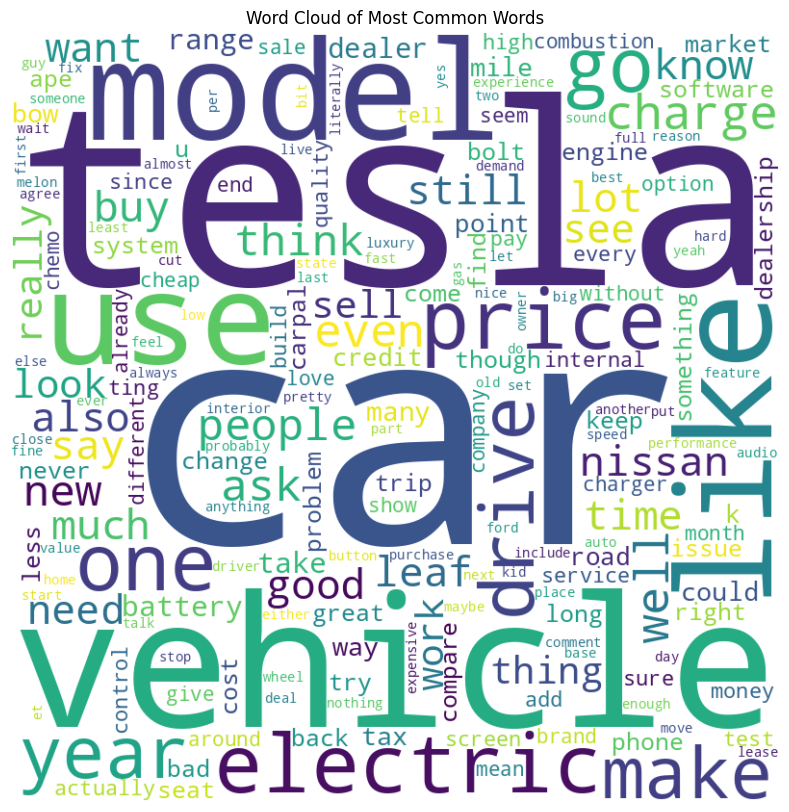

In [ ]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=800, background_color='white').generate_from_frequencies(fdist)

# Display the word cloud
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Most Common Words')
plt.show()

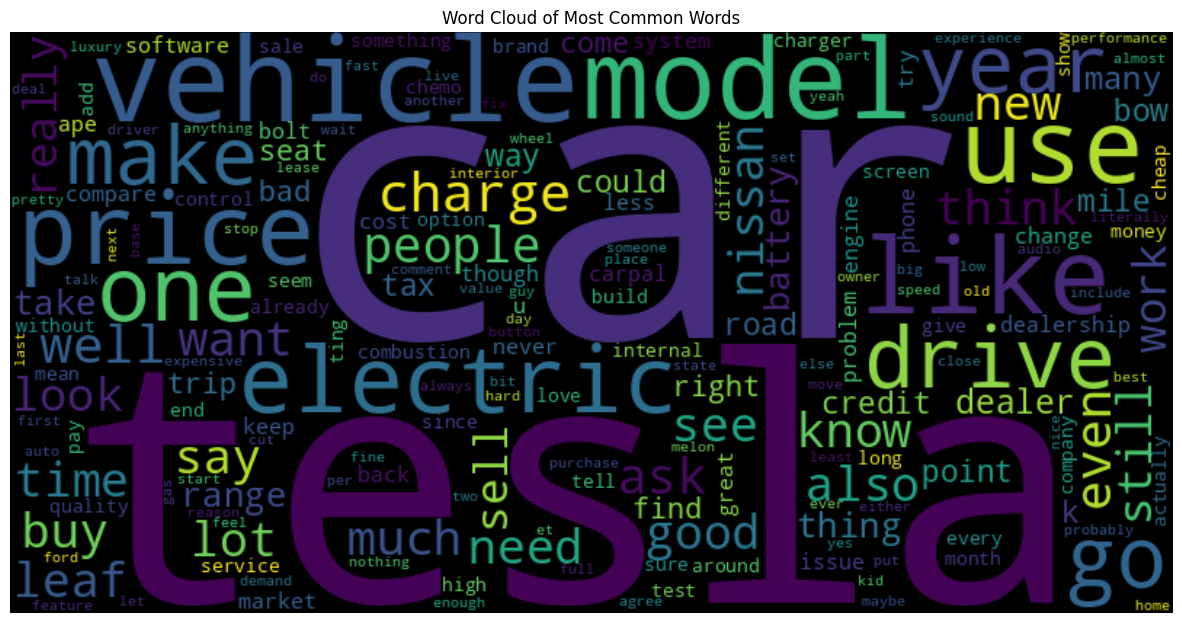

In [ ]:
from wordcloud import WordCloud

word_counter = Counter()
for row in df.to_dict("records"): #converts_to_dictionary
  word_counter.update(row["cleaned_text"].split()) #tokenization
cloud = WordCloud(width=800, height=400)
cloud.generate_from_frequencies(dict(word_counter.most_common(200)))
# image = cloud.to_image()
# image.save("wordcloud.png")
# Display the word cloud
plt.figure(figsize=(15, 10))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Most Common Words')
plt.show()

## 6. Associations and Collocations

In [ ]:
from nltk.collocations import BigramCollocationFinder, BigramAssocMeasures
words = [word for sublist in df_cleaned['cleaned_text'].str.split() for word in sublist]

bigram_measures = BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(words)

# filtering by frequency
finder.apply_freq_filter(3)

# Find the top 20 bigrams using the Pointwise Mutual Information measure
top_collocations = finder.nbest(bigram_measures.pmi, 20)
top_collocations

[('catalytic', 'converter'),
 ('tow', 'hitch'),
 ('mini', 'cooper'),
 ('pinch', 'zoom'),
 ('zoom', 'slide'),
 ('passive', 'cooling'),
 ('gear', 'shifter'),
 ('glove', 'compartment'),
 ('early', 'adopter'),
 ('west', 'coast'),
 ('east', 'coast'),
 ('false', 'assumption'),
 ('atom', 'processor'),
 ('extended', 'period'),
 ('non', 'existent'),
 ('adaptive', 'damper'),
 ('instrument', 'cluster'),
 ('weight', 'distribution'),
 ('electrify', 'america'),
 ('xc', 'recharge')]

## 7. Tabulate Collocations

In [ ]:
# DataFrame to display collocations, their frequency, and PMI score
collocations_df = pd.DataFrame([(bigram, finder.ngram_fd[bigram],
                                 finder.score_ngram(bigram_measures.pmi,
                                                    bigram[0],
                                                    bigram[1]))
                                for bigram in top_collocations],
                                columns=['Bigram', 'Frequency', 'PMI'])

# Sort by PMI or frequency
collocations_df = collocations_df.sort_values(by='PMI', ascending=False)
collocations_df

Bigram  Frequency        PMI
0   (catalytic, converter)          3  13.762451
1             (tow, hitch)          3  12.932376
2           (mini, cooper)          4  12.540059
3            (pinch, zoom)          4  12.440523
4            (zoom, slide)          4  12.177489
5       (passive, cooling)          3  12.125021
6          (gear, shifter)          3  12.025486
7     (glove, compartment)          3  12.025486
8         (early, adopter)          3  11.887982
9            (west, coast)          3  11.887982
10           (east, coast)          5  11.887982
11     (false, assumption)          3  11.803093
12       (atom, processor)          3  11.762451
13      (extended, period)          3  11.762451
14         (non, existent)          3  11.762451
15      (adaptive, damper)          4  11.762451
16   (instrument, cluster)          8  11.718057
17  (weight, distribution)          3  11.646974
18    (electrify, america)          3  11.540059
19          (xc, recharge)          3  11.540059

## 8. Heatmaps of Word Associations

In [ ]:
import numpy as np
import seaborn as sns

In [ ]:
most_common_bigrams

[(('electric', 'vehicle'), 290),
 (('nissan', 'leaf'), 173),
 (('tax', 'credit'), 83),
 (('internal', 'combustion'), 67),
 (('combustion', 'engine'), 67),
 (('road', 'trip'), 66),
 (('test', 'drive'), 40),
 (('new', 'car'), 39),
 (('tesla', 'model'), 38),
 (('build', 'quality'), 30),
 (('model', '3'), 24),
 (('engine', 'car'), 24),
 (('steer', 'wheel'), 23),
 (('last', 'year'), 23),
 (('make', 'sense'), 22),
 (('buy', 'new'), 21),
 (('brand', 'new'), 21),
 (('price', 'cut'), 21),
 (('gon', 'na'), 20),
 (('fast', 'charge'), 18)]

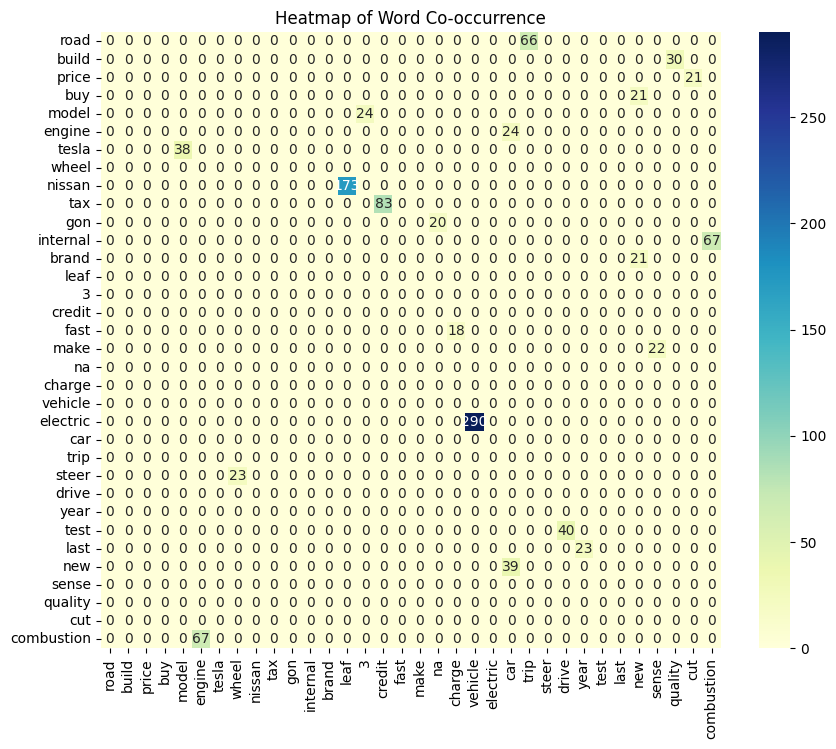

In [ ]:
# Assuming 'most_common_bigrams' is a list of bigram tuples from the previous code
bigrams = [bigram for bigram, count in most_common_bigrams]

# Create a list of unique words from the bigrams
unique_words = list(set(word for bigram in bigrams for word in bigram))

# Create an empty co-occurrence matrix
co_occ_matrix = np.zeros((len(unique_words), len(unique_words)))

# Populate the matrix by counting bigrams
for bigram, count in most_common_bigrams:
    i, j = unique_words.index(bigram[0]), unique_words.index(bigram[1])
    co_occ_matrix[i][j] = count  # This is a directed matrix; for undirected, also set co_occ_matrix[j][i]

# Create the heatmap
plt.figure(figsize=(10, 8))
ax = sns.heatmap(co_occ_matrix, annot=True, fmt='.0f',  # Adjusted format code here
                 xticklabels=unique_words, yticklabels=unique_words, cmap='YlGnBu')
plt.title('Heatmap of Word Co-occurrence')
plt.show()

## 9. Network Graphs of Word Associations

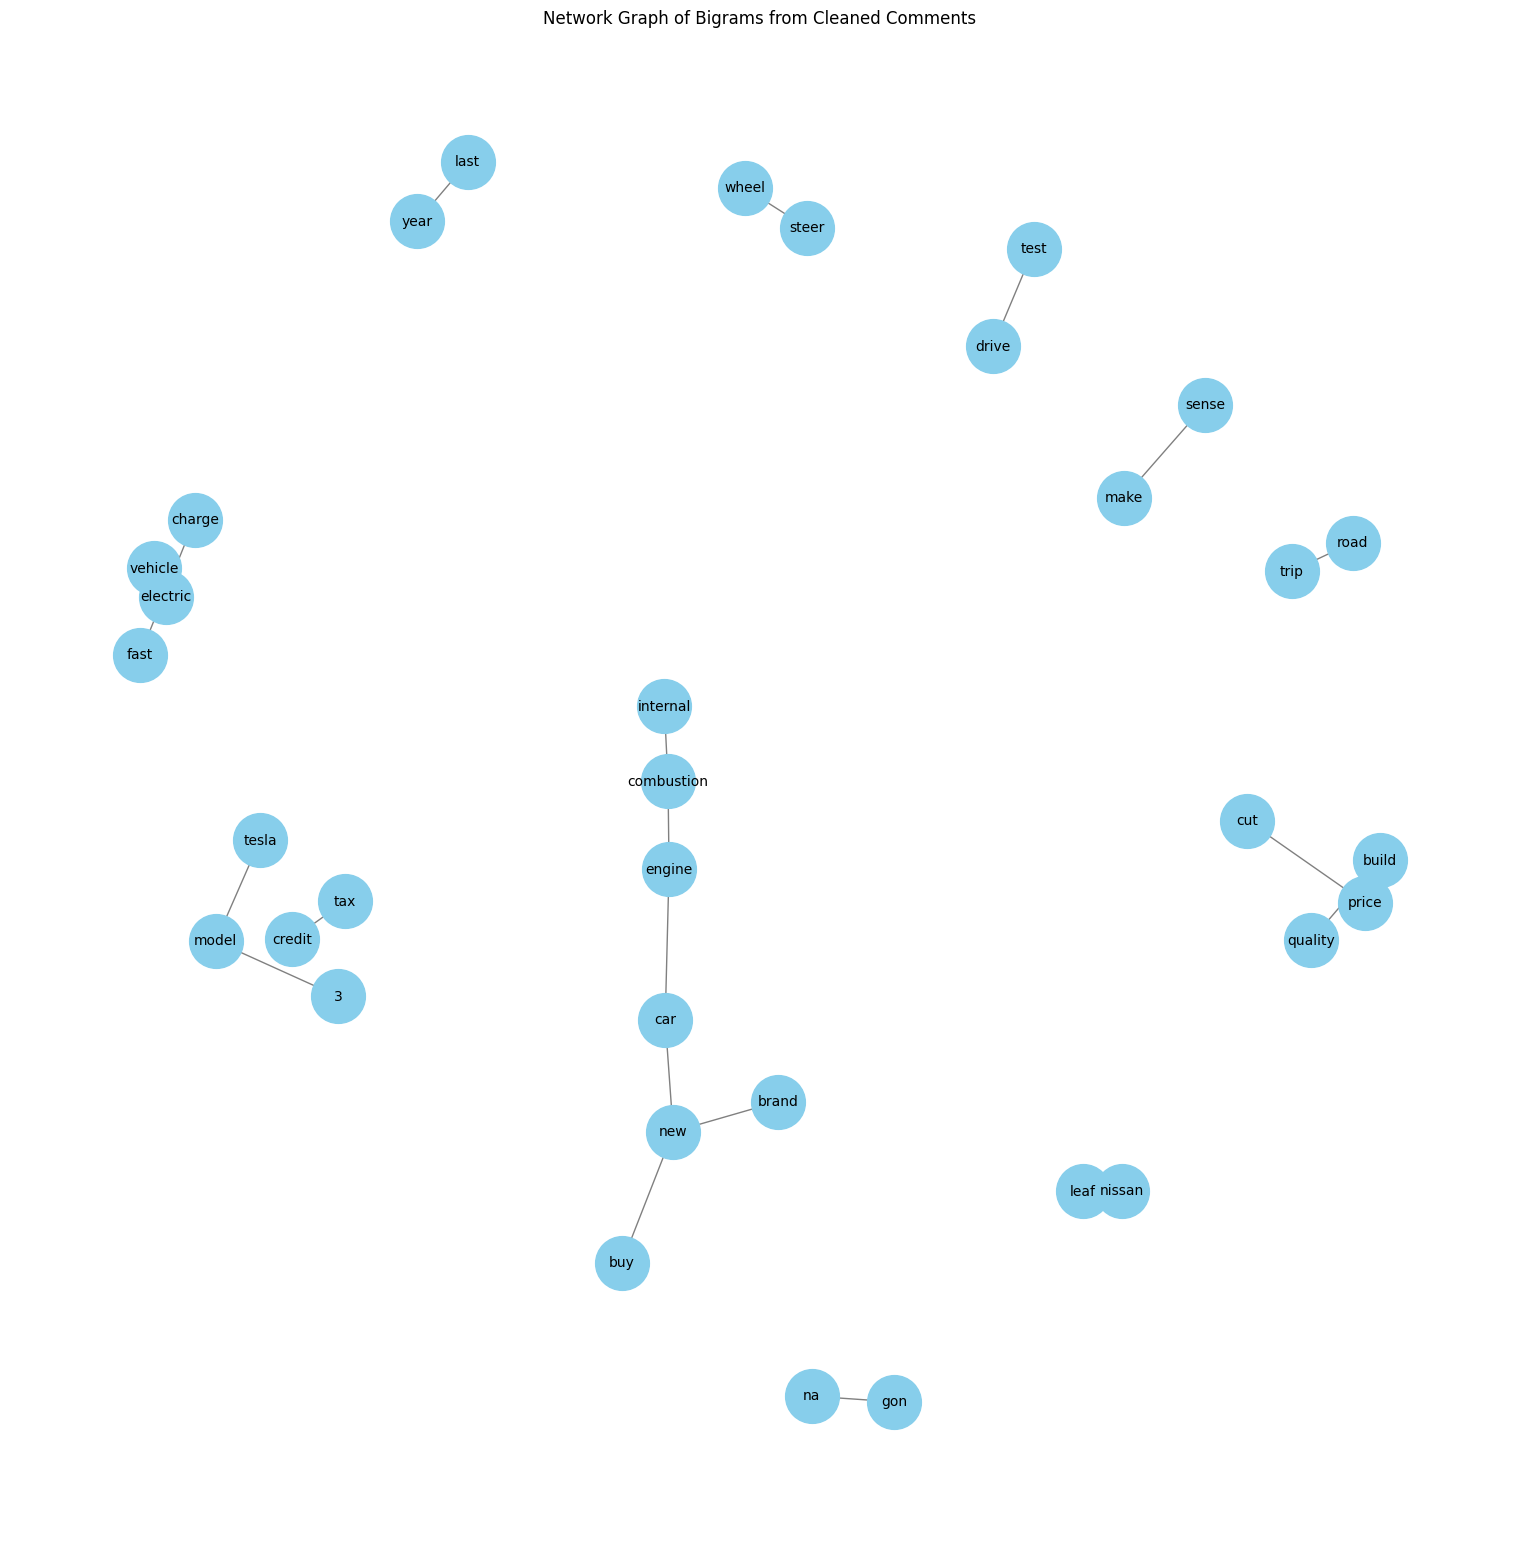

In [ ]:
import networkx as nx

# Create a graph from the bigrams
G = nx.Graph()
for bigram, count in most_common_bigrams:
    # Add an edge between the words of each bigram; the count can be a weight
    G.add_edge(bigram[0], bigram[1], weight=count)

# Draw the network graph
plt.figure(figsize=(15, 15))
pos = nx.spring_layout(G, k=1)  # k regulates the distance between nodes
nx.draw(G, pos, with_labels=True, node_color='skyblue',
        node_size=1500, edge_color='gray', linewidths=1,
        font_size=10)
plt.title('Network Graph of Bigrams from Cleaned Comments')
plt.show()

Comparision of frequency distribution of word counts before and after preprocessing steps

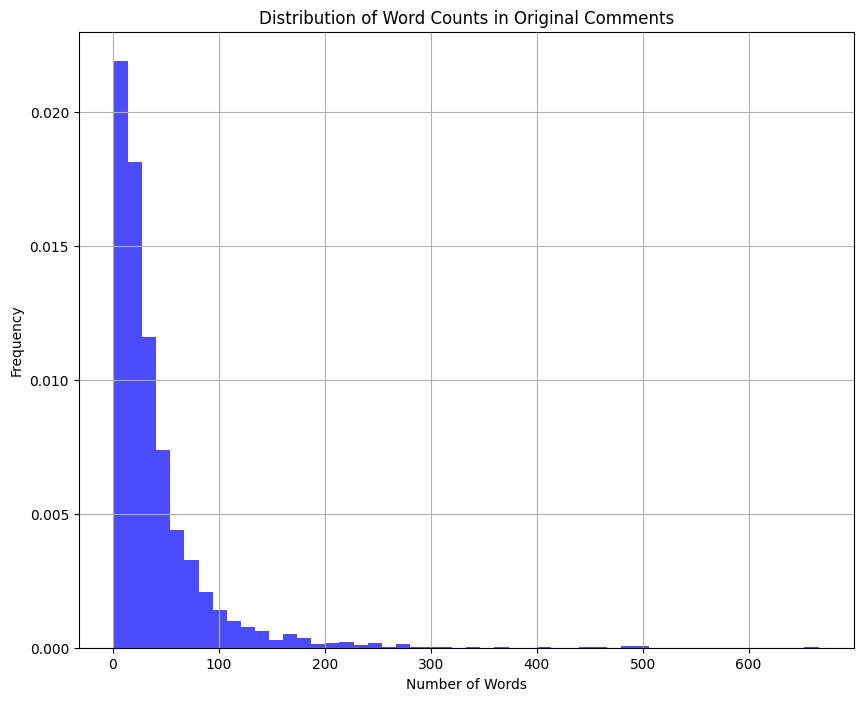

In [ ]:
# Calculate the number of words in each comment
df_cleaned['word_count'] = df_cleaned['text'].apply(lambda x: len(x.split()))

# Plot the frequency distribution of word counts
plt.figure(figsize=(10, 8))
df_cleaned['word_count'].plot(kind='hist', bins=50, density=True, alpha=0.7, color='blue')
plt.title('Distribution of Word Counts in Original Comments')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

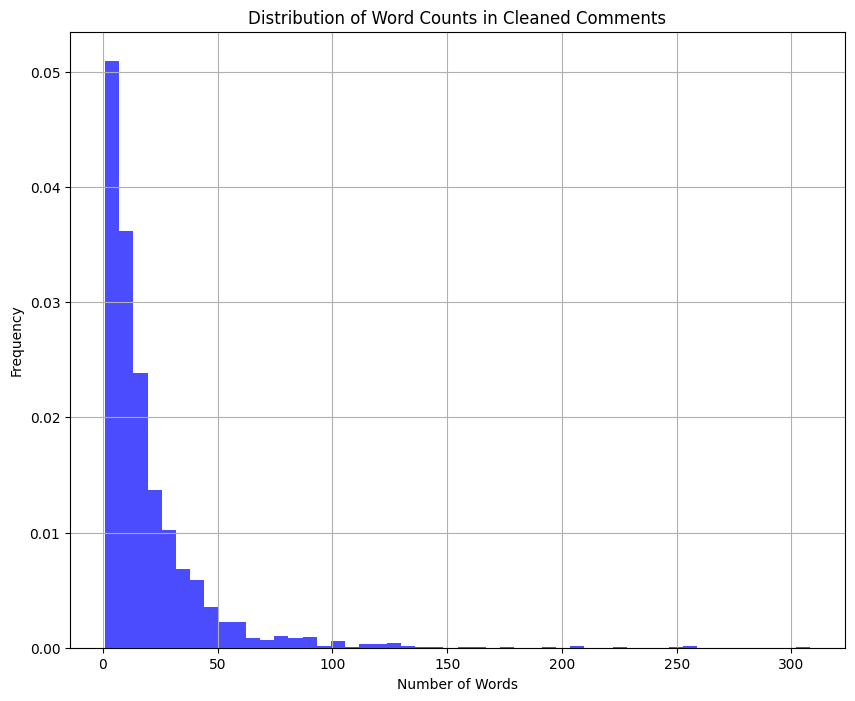

In [ ]:
# Calculate the number of words in each comment
df_cleaned['word_count_cleaned'] = df_cleaned['cleaned_text'].apply(lambda x: len(x.split()))

# Plot the frequency distribution of word counts
plt.figure(figsize=(10, 8))
df_cleaned['word_count_cleaned'].plot(kind='hist', bins=50, density=True, alpha=0.7, color='blue')
plt.title('Distribution of Word Counts in Cleaned Comments')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

## 10. Descriptive Analysis

In [ ]:
df_cleaned['len'].describe()

count    2091.000000
mean      127.533238
std       163.143859
min        10.000000
25%        37.000000
50%        79.000000
75%       152.000000
max      1954.000000
Name: len, dtype: float64

In [ ]:
# Resample to get monthly averages
monthly_sentiment = df_cleaned.resample('M', on='created_utc')['sentiment'].mean()

plt.figure(figsize=(12,6))
monthly_sentiment.plot(title='Monthly Average Sentiment')
plt.xlabel('Month')
plt.ylabel('Average Sentiment Score')
plt.show()

KeyError: 'Column not found: sentiment'

In [ ]:
import pandas as pd
df_cleaned = pd.read_csv('/content/preprocessed_data.csv')
df_cleaned

comment_id        author            timestamp  upvotes  \
0       l0xeath    GriddyGang  2024-04-23 18:33:35      111   
1       l0xfnq0      Recoil42  2024-04-23 18:41:11       27   
2       l0xogr9    Chudsaviet  2024-04-23 19:30:00       85   
3       l0yp5ae     JimmyNo83  2024-04-23 23:02:50        5   
4       l0xx1fd      SpyCake1  2024-04-23 20:17:12       12   
...         ...           ...                  ...      ...   
2086    h3aok3i   LightItUp90  2021-06-28 07:00:26        2   
2087    h3b5seh      aigarius  2021-06-28 11:28:00        1   
2088    h39hffb  ElectroSpore  2021-06-27 23:19:15        3   
2089    h39hyd2         JB_UK  2021-06-27 23:24:16        2   
2090    h39j03h  ElectroSpore  2021-06-27 23:34:15        1   

                                                   text   parent_id  \
0     Man this is tempting at 45 thousand. Absolutel...  t3_1cbbkyu   
1     I like the look of the wheels, but mannnnn tho...  t3_1cbbkyu   
2     No ultrasonic sensors, no radar, no blinker st...  t3_1cbbkyu   
3     It’s killer at that price. The m3 is just a li...  t3_1cbbkyu   
4     Considering it's the cheapest AWD Model 3 (in ...  t3_1cbbkyu   
...                                                 ...         ...   
2086  600k NOK. And probably yeah. But Model S and X...  t1_h3anqsz   
2087  I mean the year before the long March of 2020 ...  t1_h39hdbu   
2088  Personally, I expect Tesla to still dominate g...  t1_h39g5mt   
2089  On this measure VW should maintain pace, in th...  t1_h39hffb   
2090  I expect both to keep growing, more pointing o...  t1_h39hyd2   

             subreddit  awards  \
0     electricvehicles       0   
1     electricvehicles       0   
2     electricvehicles       0   
3     electricvehicles       0   
4     electricvehicles       0   
...                ...     ...   
2086  electricvehicles       0   
2087  electricvehicles       0   
2088  electricvehicles       0   
2089  electricvehicles       0   
2090  electricvehicles       0   

                                           cleaned_text  len lang  
0     man tempt thousand absolutely love seat spoile...   61   en  
1                    like look wheel man go curb magnet   34   en  
2     ultrasonic sensor radar blinker stalk gear shi...   76   en  
3     killer price tesla model 3 little snug fit lov...   59   en  
4     consider cheap model u obtainer need particula...  260   en  
...                                                 ...  ...  ...  
2086  k probably yeah model x sell poorly already do...  214   en  
2087  mean year long march decline start qi tesla e ...  193   en  
2088  personally expect tesla still dominate globall...  128   en  
2089  measure volkswagen maintain pace next year two...  134   en  
2090  expect keep grow point growth rate interesting...   57   en  

[2091 rows x 11 columns]

# 4. TEXT MINING

## 1. Topic Modeling using Gensim's LDA

In [ ]:
from gensim import corpora
from gensim.models.ldamodel import LdaModel
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
nltk.download('punkt')
nltk.download('vader_lexicon')
nltk.download([
    "punkt",
    "vader_lexicon",
    ])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
# Tokenize comments
def tokenize(text):
    return nltk.word_tokenize(text)

# prepare data for LDA
texts = df_cleaned['cleaned_text'].tolist()

# Tokenize only if the texts are not lists (check first element)
if isinstance(texts[0], str):
    texts = [tokenize(text) for text in texts]

dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# train LDA model
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=5, passes=10)

# display topics
topics = lda_model.print_topics(num_words=5)
for topic in topics:
  print(topic)

(0, '0.020*"tesla" + 0.015*"new" + 0.014*"car" + 0.014*"price" + 0.014*"leaf"')
(1, '0.028*"car" + 0.018*"tesla" + 0.013*"ask" + 0.011*"service" + 0.010*"leaf"')
(2, '0.033*"year" + 0.022*"tesla" + 0.018*"leaf" + 0.018*"nissan" + 0.016*"mile"')
(3, '0.024*"car" + 0.021*"charge" + 0.014*"battery" + 0.012*"nissan" + 0.012*"use"')
(4, '0.014*"vehicle" + 0.011*"tesla" + 0.011*"bar" + 0.009*"well" + 0.009*"car"')


In [ ]:
from gensim import corpora, models

tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]
lda_model_tfidf = models.LdaMulticore(corpus_tfidf, num_topics=10, id2word=dictionary, passes=2, workers=4)


for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.005*"ask" + 0.005*"price" + 0.004*"car" + 0.004*"model" + 0.004*"range" + 0.004*"one" + 0.004*"buy" + 0.003*"tesla" + 0.003*"think" + 0.003*"like"
Topic: 1 Word: 0.004*"car" + 0.004*"tesla" + 0.004*"need" + 0.003*"model" + 0.003*"price" + 0.003*"go" + 0.003*"vehicle" + 0.003*"one" + 0.003*"leaf" + 0.003*"electric"
Topic: 2 Word: 0.006*"car" + 0.004*"tesla" + 0.004*"nissan" + 0.004*"leaf" + 0.004*"use" + 0.003*"model" + 0.003*"price" + 0.003*"like" + 0.003*"make" + 0.003*"drive"
Topic: 3 Word: 0.006*"model" + 0.005*"ask" + 0.004*"car" + 0.004*"new" + 0.004*"like" + 0.004*"vehicle" + 0.004*"tesla" + 0.004*"well" + 0.003*"look" + 0.003*"price"
Topic: 4 Word: 0.004*"tesla" + 0.003*"mile" + 0.003*"like" + 0.003*"car" + 0.003*"leaf" + 0.003*"nissan" + 0.003*"new" + 0.003*"one" + 0.002*"thing" + 0.002*"say"
Topic: 5 Word: 0.005*"tesla" + 0.004*"vehicle" + 0.004*"charge" + 0.004*"car" + 0.004*"electric" + 0.004*"model" + 0.003*"say" + 0.003*"use" + 0.003*"like" + 0.003*"make"


In [ ]:
!pip install --upgrade pyldavis gensim joblib

In [ ]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)

In [ ]:
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model_tfidf, corpus_tfidf, dictionary)
pyLDAvis.display(vis)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


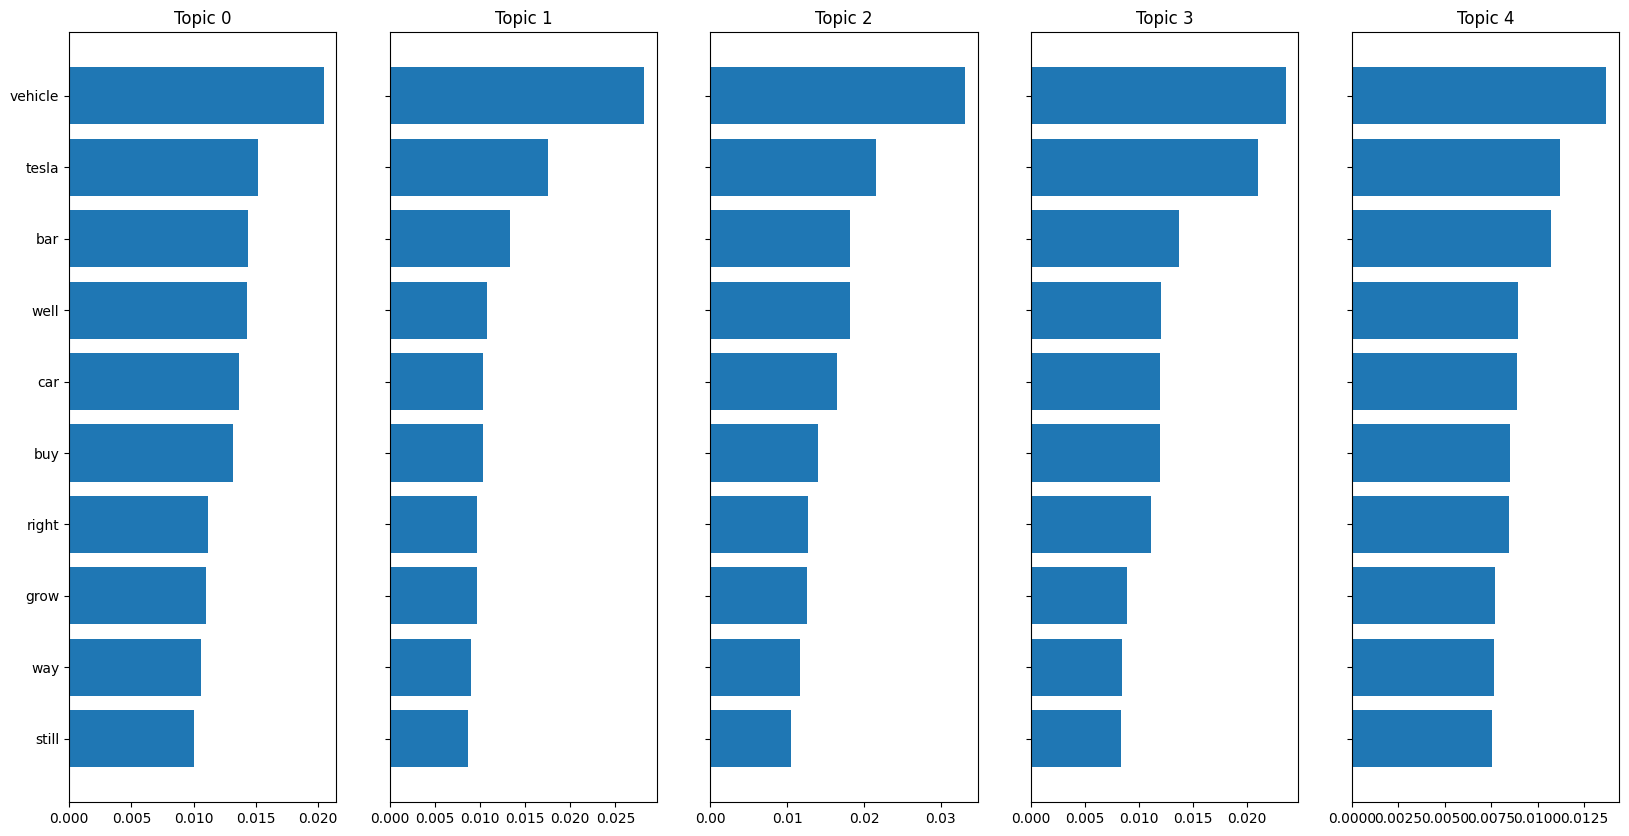

In [ ]:
topics = lda_model.show_topics(formatted=False)
fig, axes = plt.subplots(1, len(topics), figsize=(20, 10), sharey=True)

for i, ax in enumerate(axes):
    topic_words = dict(topics[i][1])
    ax.barh(range(len(topic_words)), list(topic_words.values()), align='center')
    ax.set_yticks(range(len(topic_words)))
    ax.set_yticklabels(list(topic_words.keys()))
    ax.invert_yaxis()
    ax.set_title('Topic ' + str(i))

plt.show()

## 2.Sentiment Analysis using VADER

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

df_cleaned['sentiment_vader'] = df_cleaned['cleaned_text'].apply(lambda text: sia.polarity_scores(text)['compound'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0, 0.5, 'Frequency')

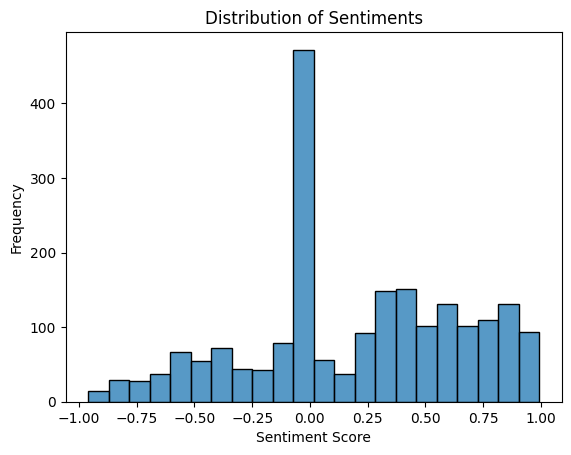

In [ ]:
import seaborn as sns
sns.histplot(df_cleaned['sentiment'])
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: title={'center': 'Frequency distribution of normalised sentiment score'}, ylabel='Frequency'>

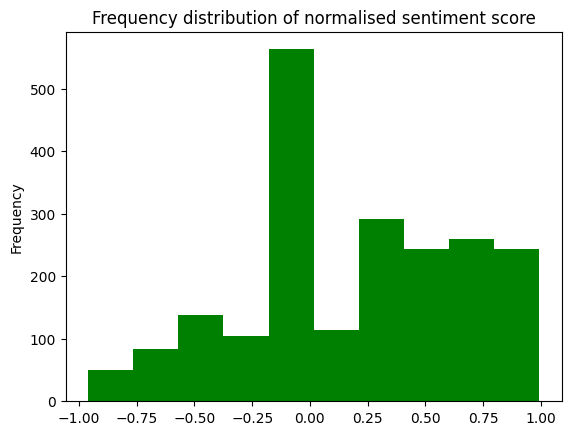

In [ ]:
df_cleaned["sentiment"].plot(kind="hist", color="g",
                         title="Frequency distribution of normalised sentiment score")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


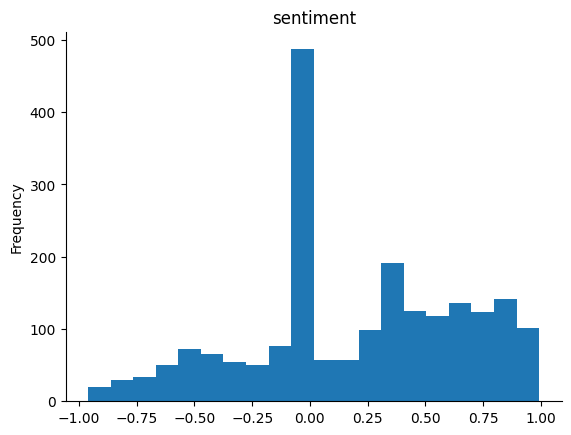

In [ ]:
from matplotlib import pyplot as plt
df_cleaned['sentiment'].plot(kind='hist', bins=20, title='sentiment')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df_cleaned.sort_values(by="sentiment",
                   ascending=False).head(5)["sentiment"].mean().round(2)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.99

In [ ]:
df_cleaned['sentiment']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0       0.6697
1       0.3612
2       0.0000
3       0.2163
4       0.7420
         ...  
2086   -0.5574
2087    0.6124
2088    0.7351
2089    0.6705
2090    0.6486
Name: sentiment, Length: 2091, dtype: float64

In [ ]:
print('Mean of sentiment: ', df_cleaned["sentiment"].mean())

Mean of sentiment:  0.20288024868483975


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df_cleaned['sentiment'].describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


count    2091.000000
mean        0.202880
std         0.460644
min        -0.960300
25%         0.000000
50%         0.202300
75%         0.585900
max         0.992900
Name: sentiment, dtype: float64

In [ ]:
df_cleaned['sentiment_category'] = df_cleaned['sentiment'].apply(
    lambda score: 'positive' if score > 0 else ('negative' if score < 0 else 'neutral'))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df_cleaned['sentiment_category'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


sentiment_category
positive    1153
negative     484
neutral      454
Name: count, dtype: int64

In [ ]:
df_cleaned.groupby('sentiment_category')['sentiment'].count().sort_values(ascending=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


sentiment_category
positive    1153
negative     484
neutral      454
Name: sentiment, dtype: int64

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:1281: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(aggregator, agg_var)


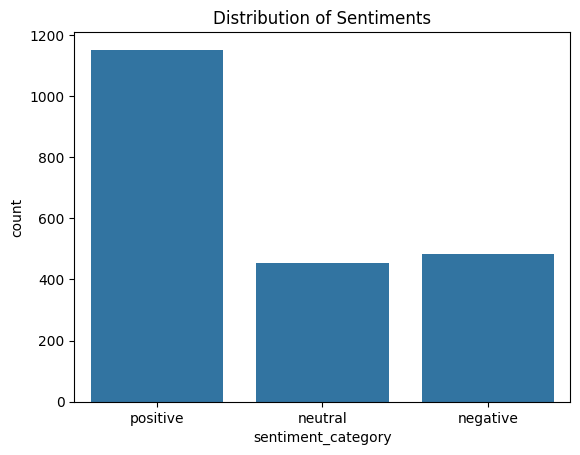

In [ ]:
sns.countplot(x='sentiment_category', data=df_cleaned)
plt.title('Distribution of Sentiments')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


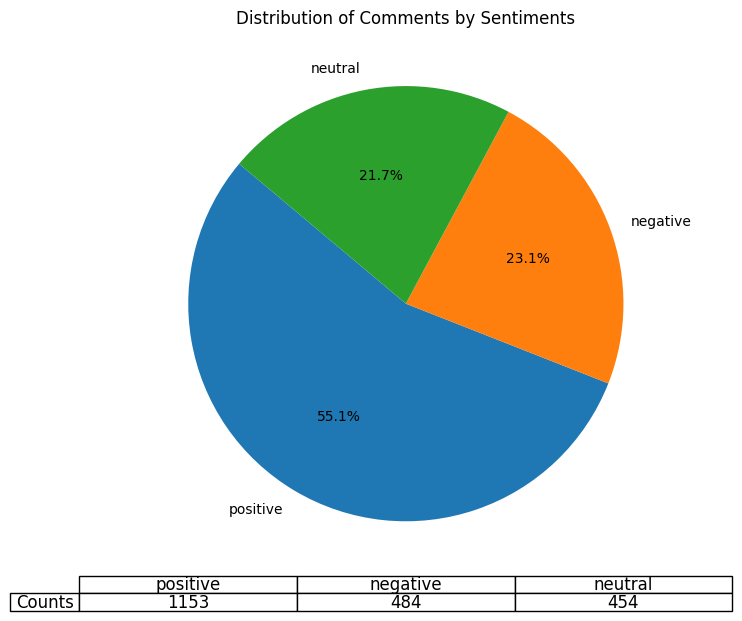

In [ ]:
# Count the occurrences of each sentiment category
sentiment_counts = df_cleaned['sentiment_category'].value_counts()

# Create a pie chart
fig, ax = plt.subplots(figsize=(10, 8))
wedges, texts, autotexts = ax.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=['#1f77b4', '#ff7f0e', '#2ca02c'])

# Add a table at the bottom of the axes
the_table = plt.table(cellText=[sentiment_counts.values],
                      rowLabels=['Counts'],
                      colLabels=sentiment_counts.index,
                      cellLoc = 'center', rowLoc = 'center',
                      loc='bottom')
the_table.auto_set_font_size(False)
the_table.set_fontsize(12)
the_table.scale(1.2, 1.2)

# Adjust layout to make room for the table:
plt.subplots_adjust(left=0.1, bottom=0.2)

plt.title('Distribution of Comments by Sentiments')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-25-b273e9f032fd>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_cleaned['sentiment'], shade=True, color="b", alpha=0.8)


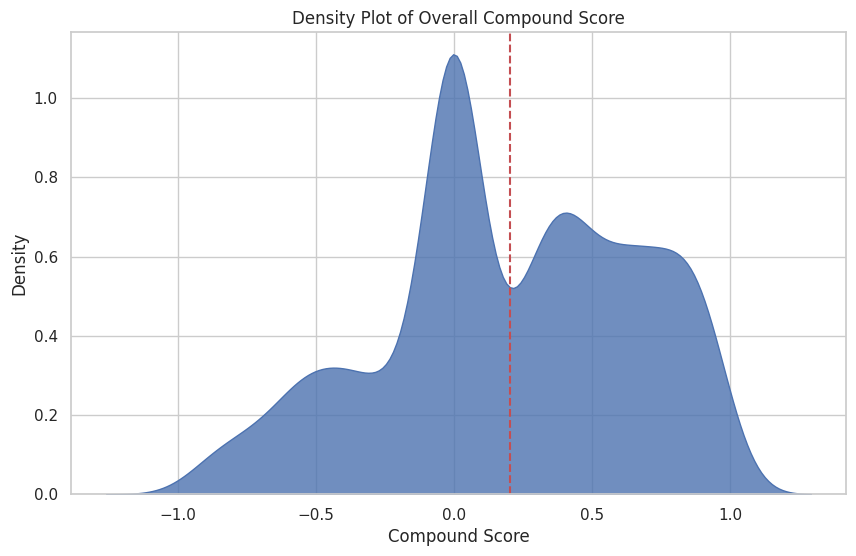

In [ ]:
sns.set(style="whitegrid")  # Setting the style of the plot

plt.figure(figsize=(10, 6))
sns.kdeplot(df_cleaned['sentiment'], shade=True, color="b", alpha=0.8)

# Adding a vertical line at mean or median as needed
plt.axvline(x=df_cleaned['sentiment'].mean(), color='r', linestyle='--')

plt.title('Density Plot of Overall Compound Score')
plt.xlabel('Compound Score')
plt.ylabel('Density')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


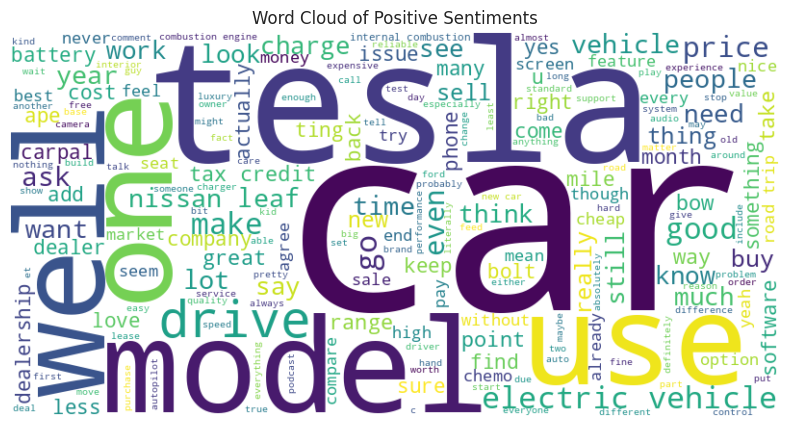

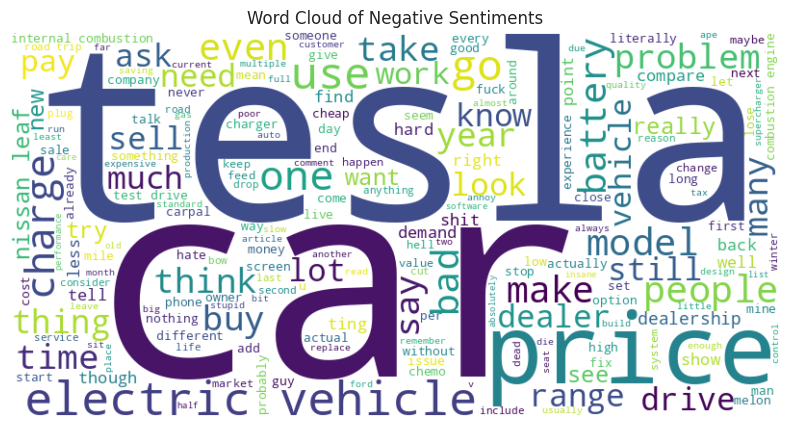

In [ ]:
from wordcloud import WordCloud
# Filter the DataFrame for positive and negative sentiments
positive_texts = df_cleaned[df_cleaned['sentiment'] > 0.1]['cleaned_text'].str.cat(sep=' ')
negative_texts = df_cleaned[df_cleaned['sentiment'] < -0.1]['cleaned_text'].str.cat(sep=' ')

# Generate word clouds
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Display word clouds
generate_wordcloud(positive_texts, 'Word Cloud of Positive Sentiments')
generate_wordcloud(negative_texts, 'Word Cloud of Negative Sentiments')

In [ ]:
df_cleaned[['author', 'timestamp', 'text', 'cleaned_text', 'len', 'sentiment']]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


author            timestamp  \
0       GriddyGang  2024-04-23 18:33:35   
1         Recoil42  2024-04-23 18:41:11   
2       Chudsaviet  2024-04-23 19:30:00   
3        JimmyNo83  2024-04-23 23:02:50   
4         SpyCake1  2024-04-23 20:17:12   
...            ...                  ...   
2086   LightItUp90  2021-06-28 07:00:26   
2087      aigarius  2021-06-28 11:28:00   
2088  ElectroSpore  2021-06-27 23:19:15   
2089         JB_UK  2021-06-27 23:24:16   
2090  ElectroSpore  2021-06-27 23:34:15   

                                                   text  \
0     Man this is tempting at 45 thousand. Absolutel...   
1     I like the look of the wheels, but mannnnn tho...   
2     No ultrasonic sensors, no radar, no blinker st...   
3     It’s killer at that price. The m3 is just a li...   
4     Considering it's the cheapest AWD Model 3 (in ...   
...                                                 ...   
2086  600k NOK. And probably yeah. But Model S and X...   
2087  I mean the year before the long March of 2020 ...   
2088  Personally, I expect Tesla to still dominate g...   
2089  On this measure VW should maintain pace, in th...   
2090  I expect both to keep growing, more pointing o...   

                                           cleaned_text  len  sentiment  
0     man tempt thousand absolutely love seat spoile...   61     0.6697  
1                    like look wheel man go curb magnet   34     0.3612  
2     ultrasonic sensor radar blinker stalk gear shi...   76     0.0000  
3     killer price tesla model 3 little snug fit lov...   59     0.2163  
4     consider cheap model u obtainer need particula...  260     0.7420  
...                                                 ...  ...        ...  
2086  k probably yeah model x sell poorly already do...  214    -0.5574  
2087  mean year long march decline start qi tesla e ...  193     0.6124  
2088  personally expect tesla still dominate globall...  128     0.7351  
2089  measure volkswagen maintain pace next year two...  134     0.6705  
2090  expect keep grow point growth rate interesting...   57     0.6486  

[2091 rows x 6 columns]

## Tesla vs Nissan Leaf models comparision

In [ ]:
# Filtering comments for each model
tesla_comments = df_cleaned[df_cleaned['cleaned_text'].str.contains("tesla", case=False, na=False)]
nissan_comments = df_cleaned[df_cleaned['cleaned_text'].str.contains("nissan|leaf", case=False, na=False)]

In [ ]:
tesla_comments[['author', 'timestamp', 'text', 'cleaned_text', 'len', 'sentiment', 'sentiment_category']].head()

author            timestamp  \
3            JimmyNo83  2024-04-23 23:02:50   
4             SpyCake1  2024-04-23 20:17:12   
6             cyco1978  2024-04-24 17:38:00   
7  NewRefrigerator7461  2024-04-25 22:12:11   
8     NihilisticTanuki  2024-04-23 21:18:05   

                                                text  \
3  It’s killer at that price. The m3 is just a li...   
4  Considering it's the cheapest AWD Model 3 (in ...   
6  Here’s a real review from someone who drives‼️...   
7  This is going to change the world of performan...   
8  The price-performance ratio is really nice but...   

                                        cleaned_text  len  sentiment  \
3  killer price tesla model 3 little snug fit lov...   59     0.2163   
4  consider cheap model u obtainer need particula...  260     0.7420   
6  real review someone drive really ting sick giv...  140    -0.5542   
7  go change world performance car forever right ...  203    -0.4019   
8  priceperformance ratio really nice dismiss tes...  238     0.8393   

  sentiment_category  
3           positive  
4           positive  
6           negative  
7           negative  
8           positive

In [ ]:
nissan_comments[['author', 'timestamp', 'text', 'cleaned_text', 'len', 'sentiment', 'sentiment_category']].head()

author            timestamp  \
959            Sensorama  2023-10-07 03:25:10   
1205       YinglingLight  2023-10-07 22:40:59   
1254  SuperFightingRobit  2023-10-07 19:42:58   
1269       SirTwitchALot  2024-01-14 05:29:32   
1270         gabetravels  2024-01-14 04:53:31   

                                                   text  \
959   When I bought my used Leaf the dealer tried to...   
1205  Believe me, I fully understand the Powers of t...   
1254  What do you mean that's not how words work? Th...   
1269  The Leaf is one of the slower charging vehicle...   
1270  I love my Leaf but I'm looking forward to gett...   

                                           cleaned_text   len  sentiment  \
959   bought use nissan leaf dealer try add mandator...    65     0.0772   
1205  believe fully understand power power far encom...   297     0.6597   
1254  mean word work say something reliable title bo...  1031     0.8779   
1269  nissan leaf one slow charge vehicle us chemo w...   167     0.1265   
1270  love nissan leaf look forward ting non chemo e...    67     0.6369   

     sentiment_category  
959            positive  
1205           positive  
1254           positive  
1269           positive  
1270           positive

In [ ]:
tesla_comments.describe()

upvotes  awards          len   sentiment
count  478.000000   478.0   478.000000  478.000000
mean     5.085774     0.0   218.694561    0.293760
std     14.831512     0.0   247.762809    0.511201
min    -39.000000     0.0    17.000000   -0.943200
25%      1.000000     0.0    77.250000    0.000000
50%      2.000000     0.0   141.500000    0.361200
75%      5.000000     0.0   263.750000    0.757900
max    147.000000     0.0  1954.000000    0.992900

In [ ]:
nissan_comments.describe()

upvotes  awards          len   sentiment
count  141.000000   141.0   141.000000  141.000000
mean    14.340426     0.0   172.326241    0.305057
std     64.383209     0.0   172.013102    0.457551
min    -94.000000     0.0    11.000000   -0.895700
25%      1.000000     0.0    70.000000    0.000000
50%      3.000000     0.0   117.000000    0.381800
75%      8.000000     0.0   207.000000    0.669700
max    693.000000     0.0  1036.000000    0.961800

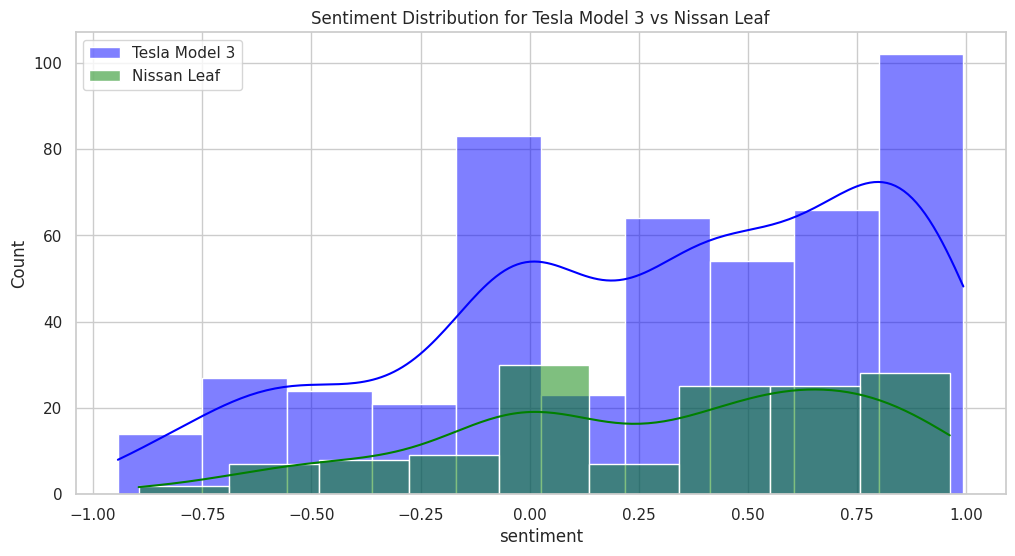

In [ ]:
# Sentiment distribution
plt.figure(figsize=(12, 6))
sns.histplot(tesla_comments['sentiment'], color='blue', label='Tesla Model 3', kde=True)
sns.histplot(nissan_comments['sentiment'], color='green', label='Nissan Leaf', kde=True)
plt.legend()
plt.title('Sentiment Distribution for Tesla Model 3 vs Nissan Leaf')
plt.show()

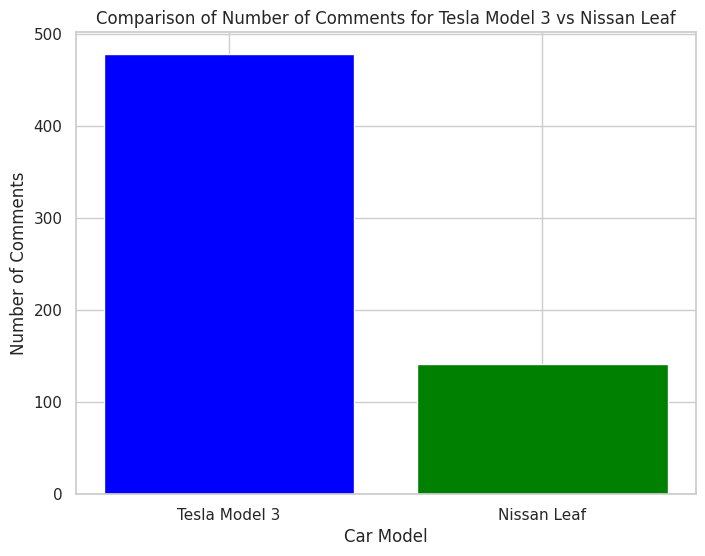

In [ ]:
num_tesla_comments = len(tesla_comments)
num_nissan_comments = len(nissan_comments)

# Data to plot
labels = ['Tesla Model 3', 'Nissan Leaf']
counts = [num_tesla_comments, num_nissan_comments]

# Creating the bar chart
plt.figure(figsize=(8, 6))
plt.bar(labels, counts, color=['blue', 'green'])
plt.xlabel('Car Model')
plt.ylabel('Number of Comments')
plt.title('Comparison of Number of Comments for Tesla Model 3 vs Nissan Leaf')
plt.show()

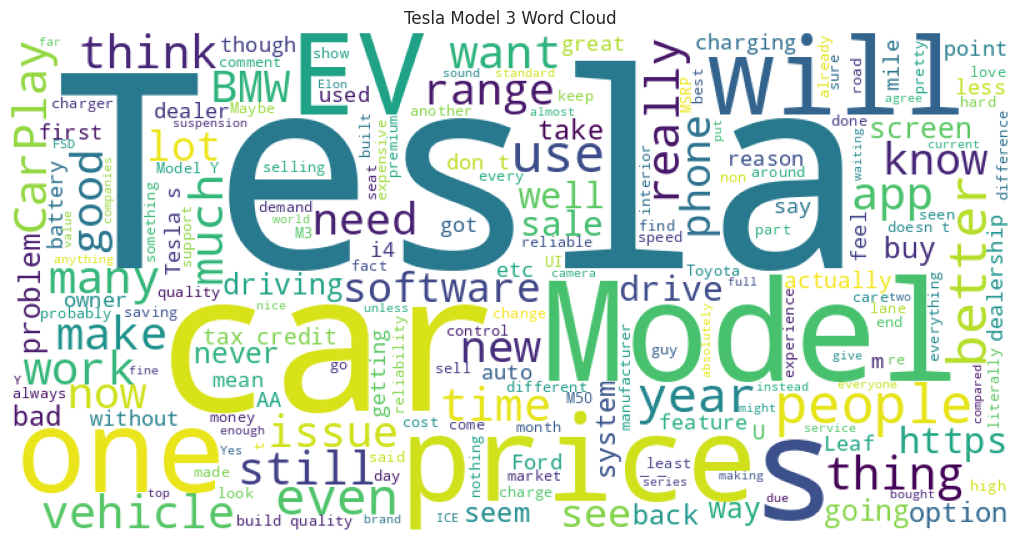

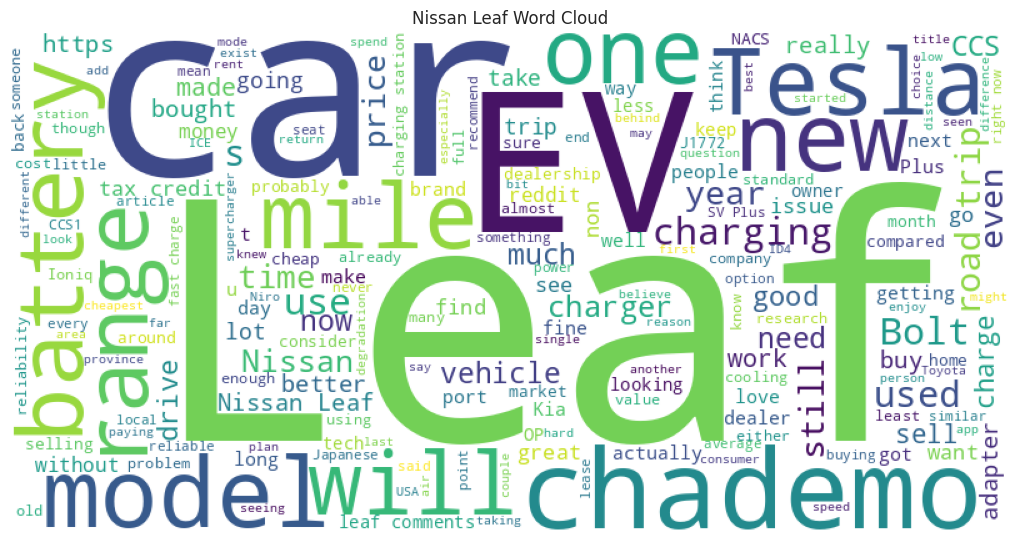

In [ ]:
def plot_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(' '.join(text))
    plt.figure(figsize=(10, 7), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title(title)
    plt.tight_layout(pad=0)
    plt.show()

plot_word_cloud(tesla_comments['text'], 'Tesla Model 3 Word Cloud')
plot_word_cloud(nissan_comments['text'], 'Nissan Leaf Word Cloud')

In [ ]:
from scipy.stats import ttest_ind

# Compare the means of two independent samples of sentiments
t_stat, p_val = ttest_ind(tesla_comments['sentiment'], nissan_comments['sentiment'])
print('T-statistic:', t_stat)
print('P-value:', p_val)

T-statistic: -0.2359807910395631
P-value: 0.813525886784287


## Evlauation of VADER sentiment model

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from IPython.display import display, HTML
def pretty_print(text):
    # Format the text using HTML to wrap within the notebook cell
    wrapped_text = "<div style='word-wrap: break-word; white-space: pre-wrap;'>" + text + "</div>"
    display(HTML(wrapped_text))

In [ ]:
def sentiment_analyzer_scores(sentence):
    # Get the sentiment scores
    score = sia.polarity_scores(sentence)
    # Format the sentence and its scores into a string
    return "{:-<40} {}".format(sentence, str(score))

- Test 1

In [ ]:
df_cleaned['text'][11]

"I want folks to remember, through the Cyber Truck nonsense... that most other Teslas are great cars (Some over-engineered bits like the stupid Glove Box access...) but they're good cars. (CyberTruck excluded, of course)"

In [ ]:
# Get the sentiment scores for a specific cleaned text entry
# Display the result using the pretty_print function
pretty_print(sentiment_analyzer_scores(df_cleaned['cleaned_text'][11]))

- Test 2

In [ ]:
df_cleaned['text'][112]

'Tesla provides Spotify, Tidal, Apple Music… probably some that I’m forgetting. Plus YouTube, Netflix, Disney+, etc.'

In [ ]:
pretty_print(sentiment_analyzer_scores(df_cleaned['cleaned_text'][112]))

- Test 3

In [ ]:
df_cleaned['text'][1111]

"> Don't care. Never used it, never needed it. Tesla's UI does everything I want from my car without having to hook my phone in for anything but Bluetooth audio.    There's ways to cheese it, but I want WhatsApp natively.  But speaking of cheesing, someone built a dealie based on a RasPi that actually allows both Carplay and Android Auto to work in a Tesla if you want.  It's a few hundred bucks though.   It works through the browser so nothing else is affected."

In [ ]:
pretty_print(sentiment_analyzer_scores(df_cleaned['cleaned_text'][1111]))